**ES234422 – PEMODELAN DAN ANALITIKA PREDIKTIF**

**TUGAS GROUP PROJECT**


**EKSPLORASI, PRAPROSES DATA, DAN KLASIFIKASI**


Nama Anggota Kelompok :
1. Shabrina Nur Ihsani     (5026221002)
2. Nailah Azzahra          (5026221010)
3. Kayla Kirani Kusnadi    (5026221111)

# **TGP 1**

## **Raw Data Collection**

In [ ]:
# Import Library Python
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, f1_score, roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# Membaca Datasets Mentah
data = pd.read_csv('Data.csv')
data

,age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;subscribe
0,58;management;married;tertiary;no;2143;yes;no;...
1,44;technician;single;secondary;no;29;yes;no;un...
2,33;entrepreneur;married;secondary;no;2;yes;yes...
3,47;blue-collar;married;unknown;no;1506;yes;no;...
4,33;unknown;single;unknown;no;1;no;no;unknown;5...
...,...
45206,51;technician;married;tertiary;no;825;no;no;ce...
45207,71;retired;divorced;primary;no;1729;no;no;cell...
45208,72;retired;married;secondary;no;5715;no;no;cel...
45209,57;blue-collar;married;secondary;no;668;no;no;...


In [ ]:
# Pemisahan kolom

# Split Properti Atribut
data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','subscribe']] = data['age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;subscribe'].str.split(';', expand=True)

# Drop Properti Atribut yang tidak Diperlukan
data = data.drop(columns='age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;subscribe')

# Print records
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## **Data Praprocessing**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   45211 non-null  object
 16  subscribe  45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


### **Change The Data Type**

In [ ]:
data['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [ ]:
def convert_month_to_int(month_string):
    month_dict = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12
    }
    return month_dict.get(month_string.lower())

data['month'] = data['month'].apply(convert_month_to_int)

data['age'] = data['age'].astype(int)
data['balance'] = data['balance'].astype(int)
data['day'] = data['day'].astype(int)
data['month'] = data['month'].astype(int)
data['duration'] = data['duration'].astype(int)
data['campaign'] = data['campaign'].astype(int)
data['pdays'] = data['pdays'].astype(int)
data['previous'] = data['previous'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  subscribe  45211 non-null  object
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


## **Explaratory Data Before Cleaning**

### **Statistical Analysis**

In [ ]:
# menampilkan mean, standar deviasi, min, kuartil (25%, 50%, 75%) dan max (pandas)
data.describe()

,age,balance,day,month,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000


### **Univariate Analysis**

In [ ]:
# Function to create Horizontal Barchart
def horizontal_barchart1(data, column, title, xlabel, ylabel, sizeX=12, sizeY=4):
  count = data[column].value_counts()

  index = count.index
  values = count.values

  fig, ax = plt.subplots(figsize=(sizeX, sizeY))
  bars = plt.barh(index, values, color="grey")

  plt.title(title)
  plt.xlabel(xlabel, labelpad=10)
  plt.ylabel(ylabel, labelpad=10)

  plt.xticks(rotation="vertical")

  for value, bar in zip(values, bars):
    ax.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center', fontsize=10)

  plt.show()

> 1. `value_counts()`: Menghitung jumlah kemunculan setiap nilai dalam kolom yang ditentukan untuk menentukan height setiap bar.
2. `index` dan `values`: Menyimpan indeks dan nilai-nilai hasil perhitungan sebelumnya.
3. `plt.barh()`: Membuat diagram batang horizontal dengan index sebagai label sumbu x dan values sebagai width setiap bar.
4. `ax.text()`: Menambahkan teks yang menunjukkan jumlah nilai di setiap bar.
5. `plt.title()`, `plt.xlabel()`, `plt.ylabel()`: Menambahkan judul diagram batang, label sumbu x, dan label sumbu y.
6. `plt.xticks(rotation="vertical")`: Memutar label sumbu x secara vertikal menggunakan plt.xticks(rotation="vertical").
7. Memanggil `plt.show()` untuk menampilkan diagram batang yang telah dibuat.

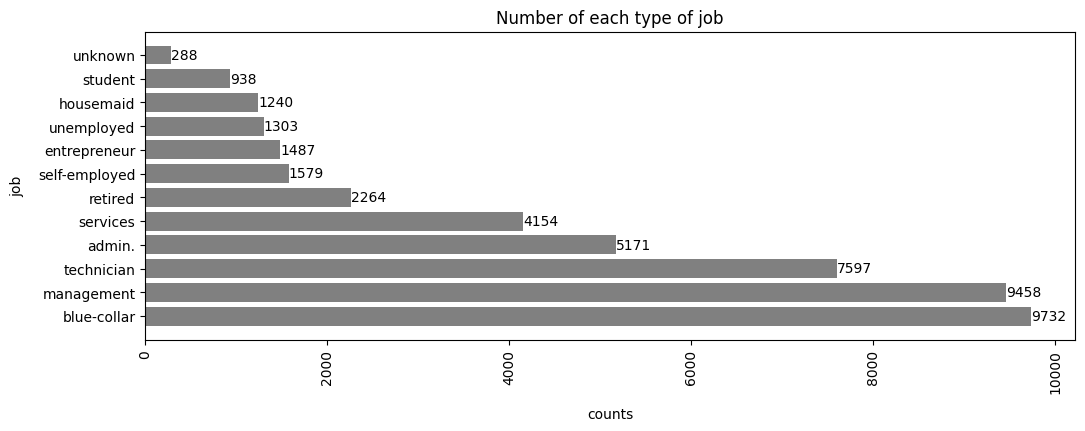

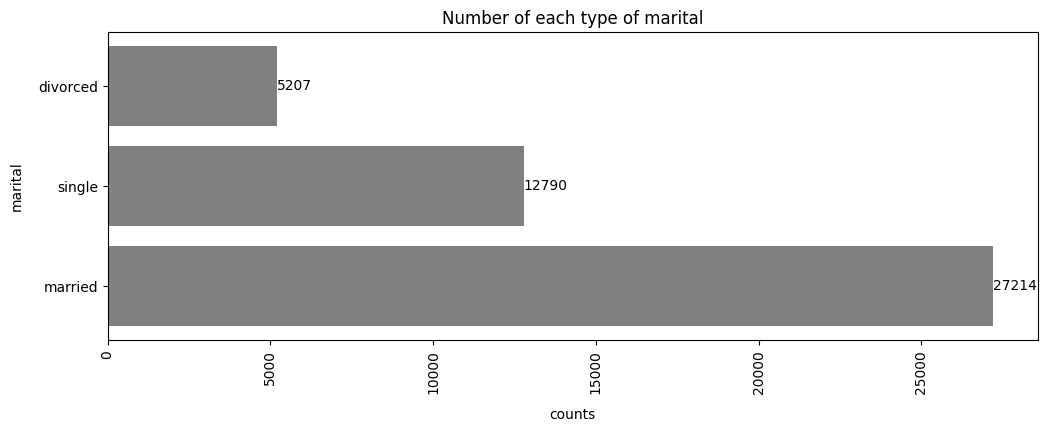

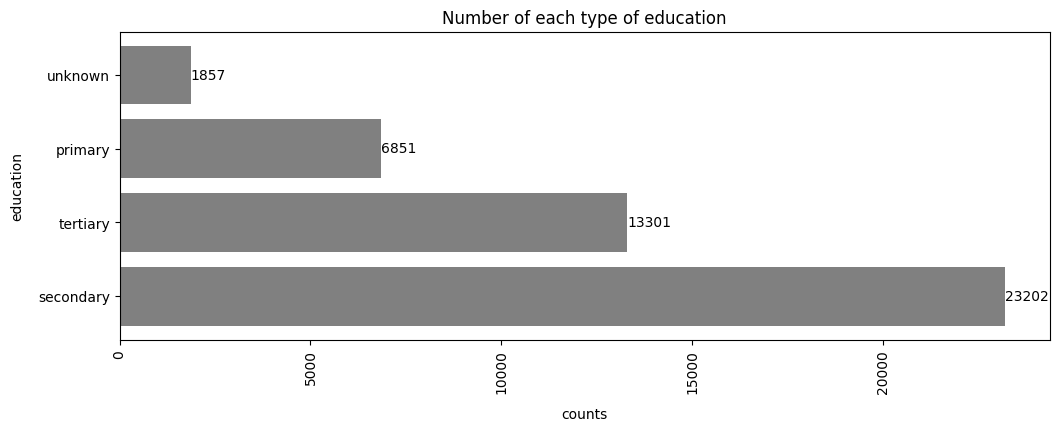

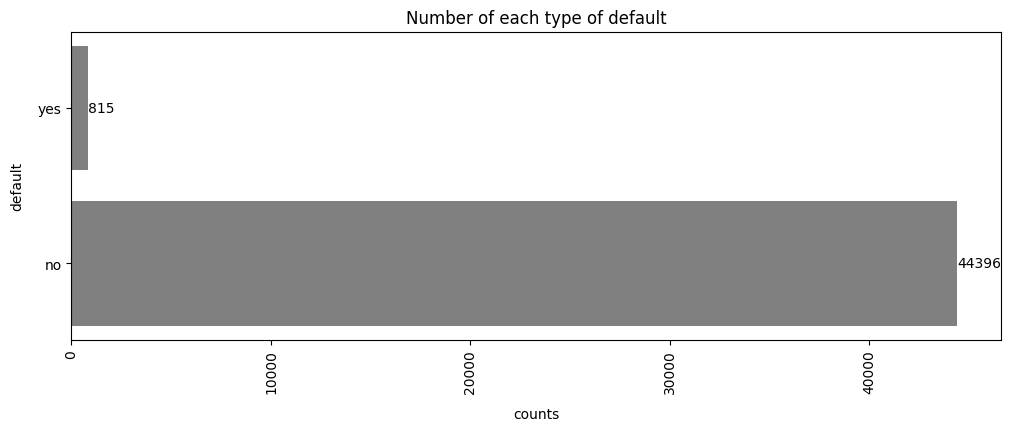

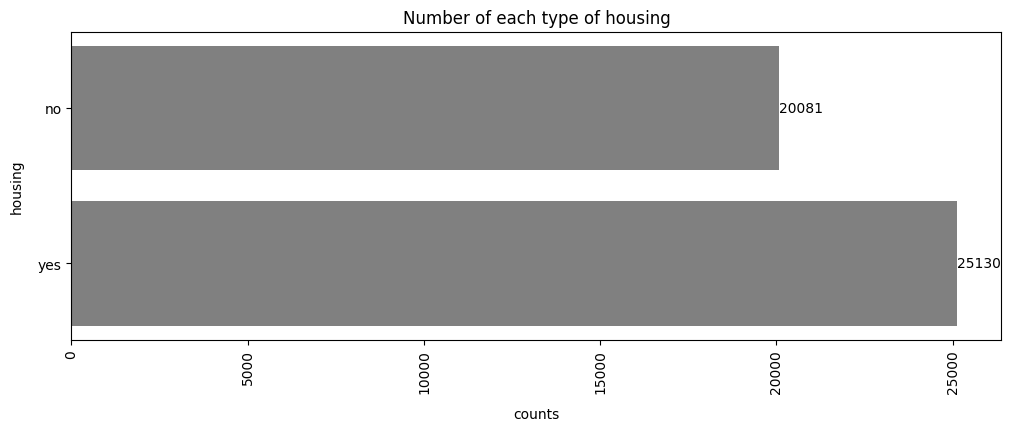

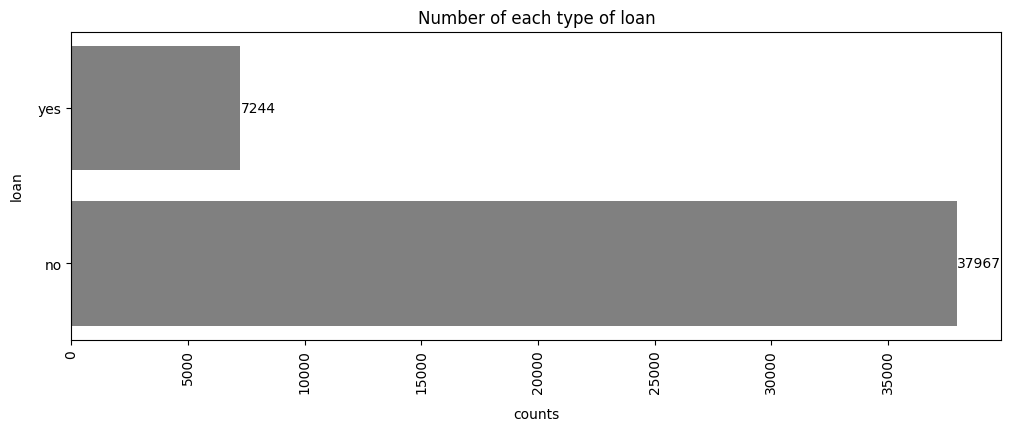

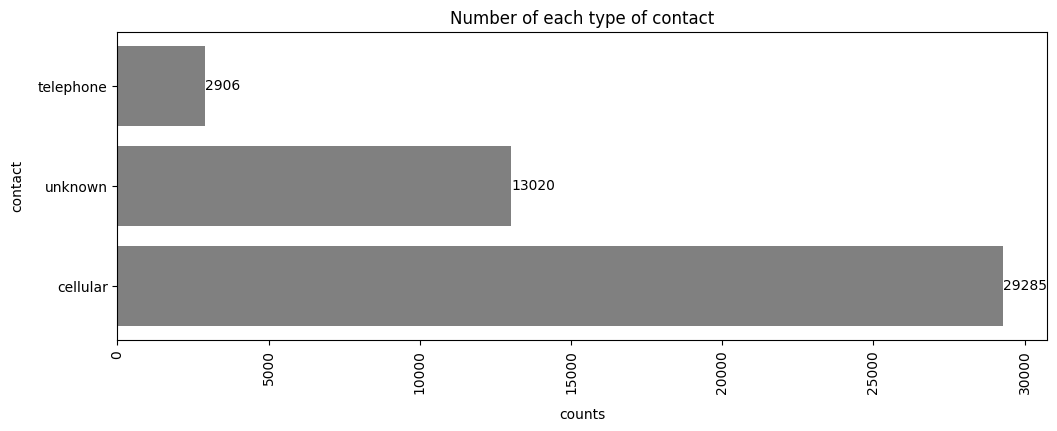

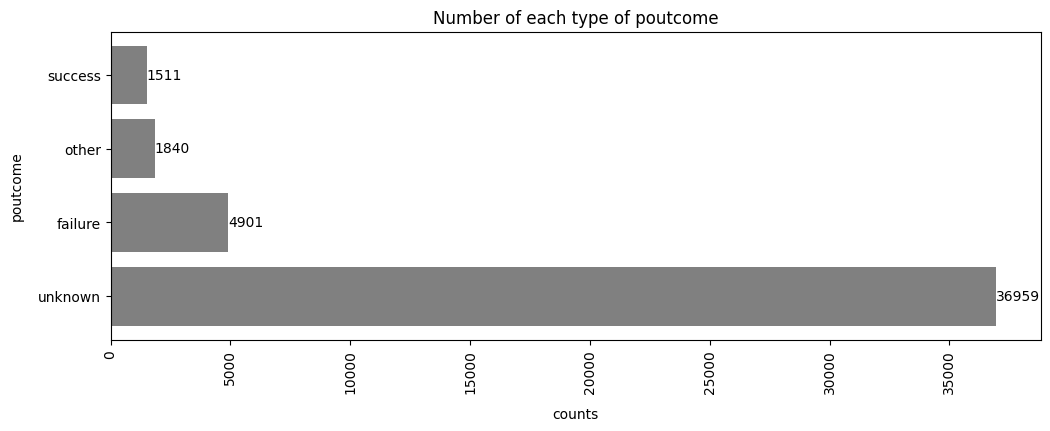

In [ ]:
# visualization for categorical attribute
columns_to_exclude = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'subscribe']
for column in data:
  if column not in columns_to_exclude:
    horizontal_barchart1(data, column, 'Number of each type of ' + column, 'counts', column)

In [ ]:
# function for histogram
def histogram(data, column, title, xlabel, ylabel):
  plt.figure(figsize = (10, 10))
  plt.hist(data[column], color = "grey")
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.subplots_adjust(hspace=0.5)
  plt.show()

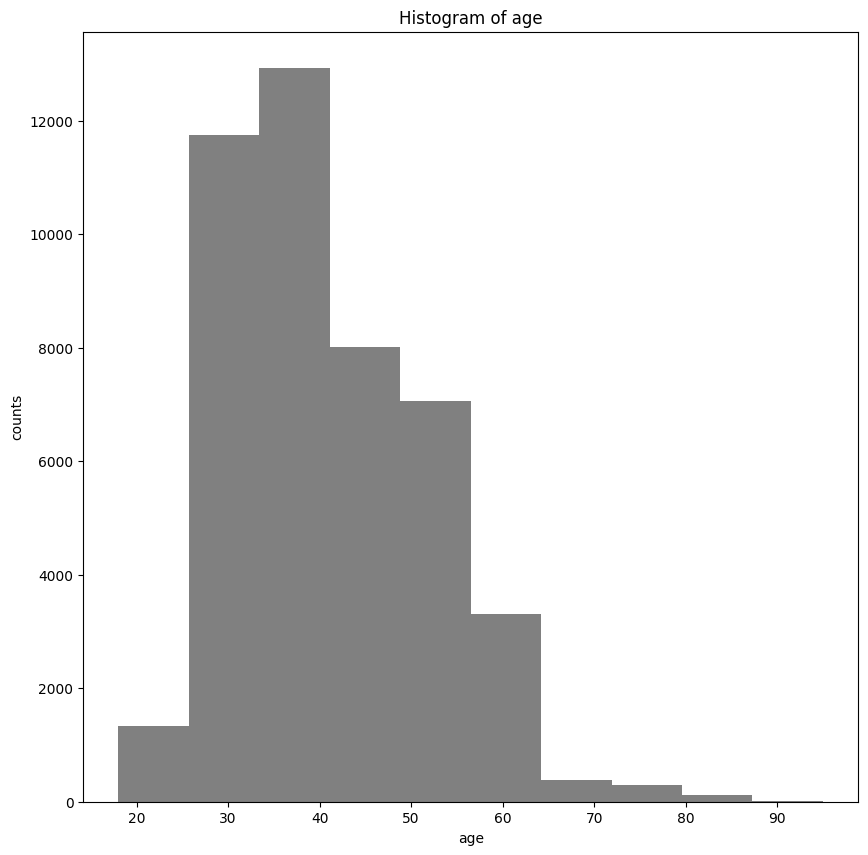

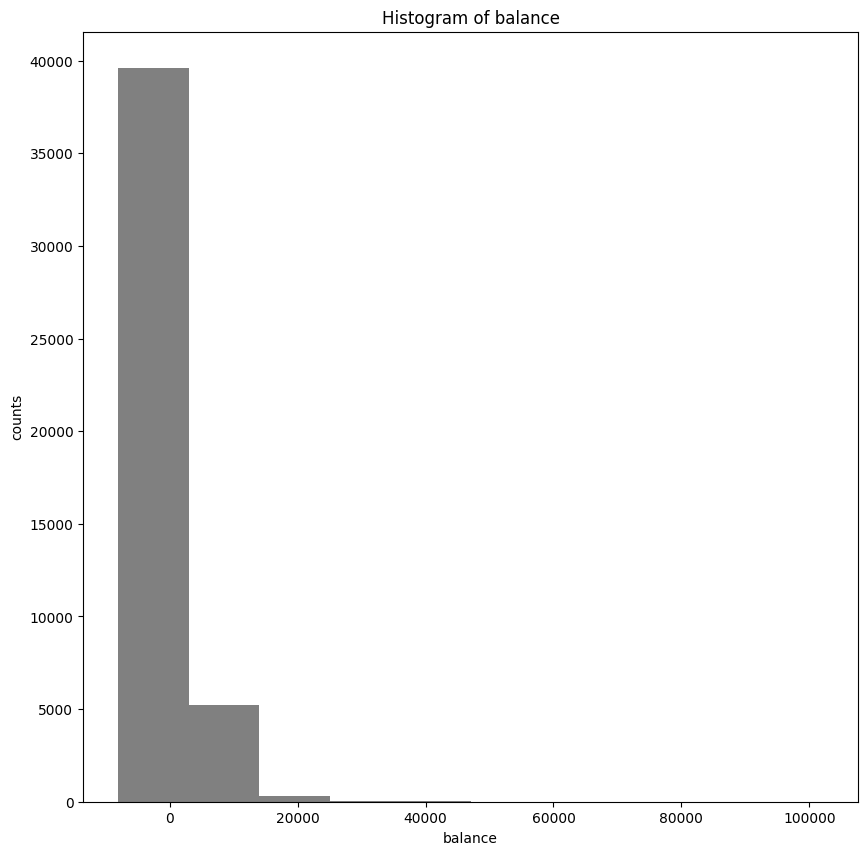

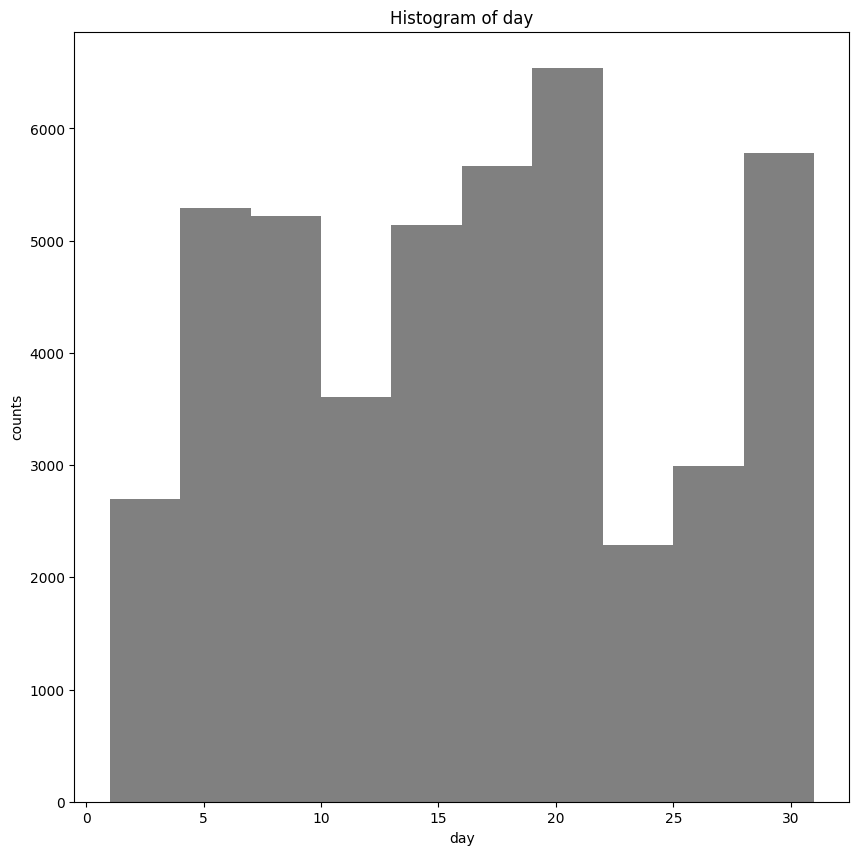

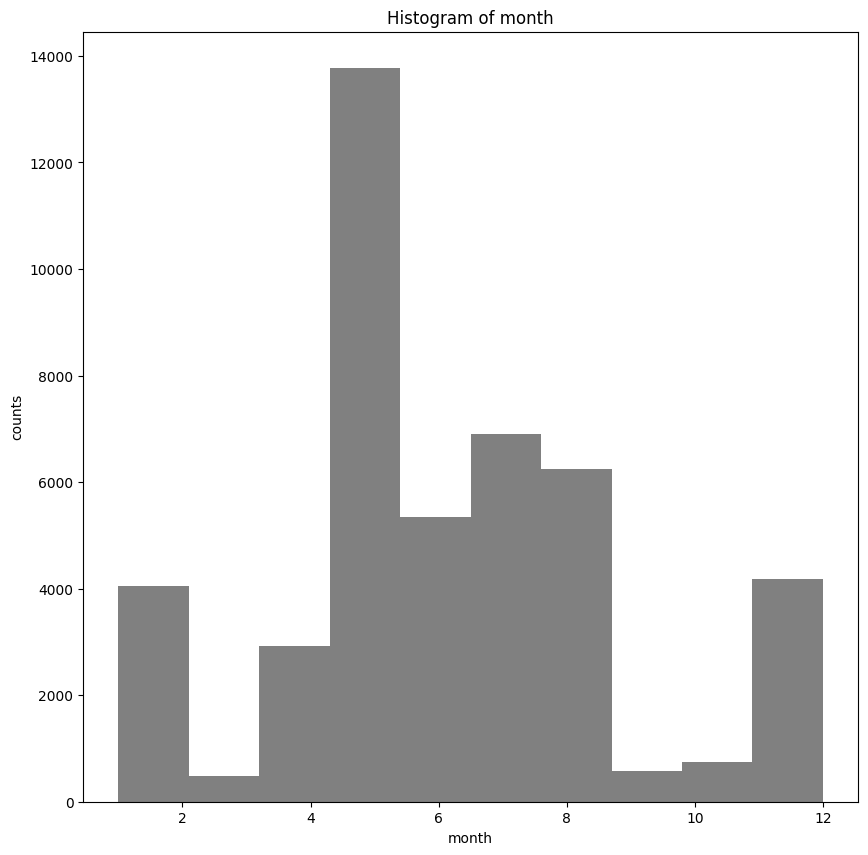

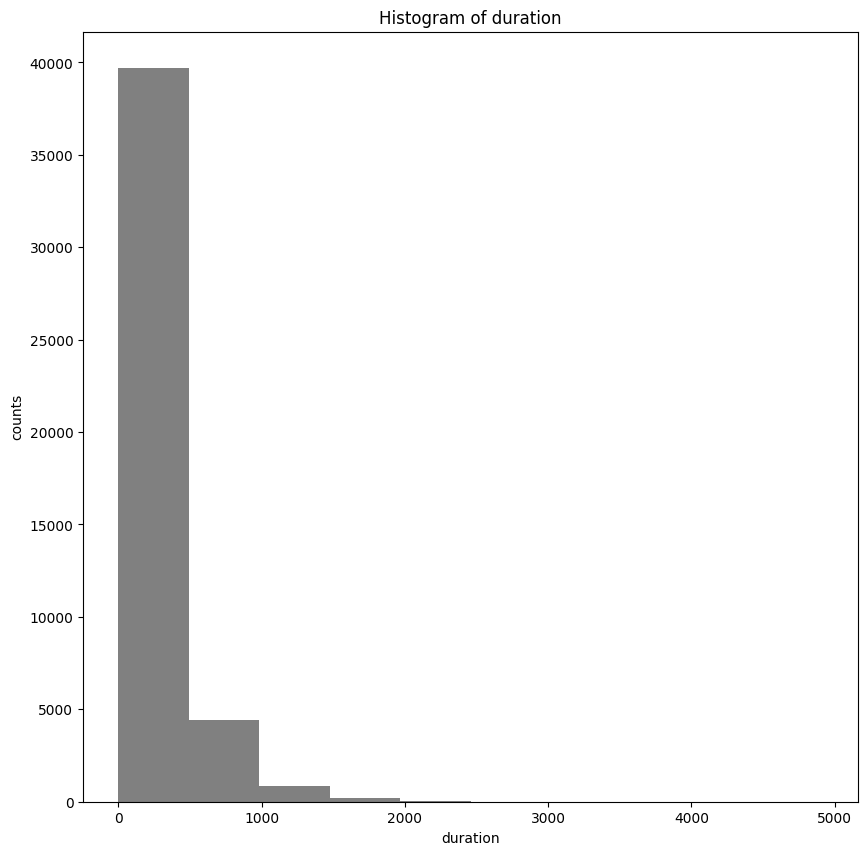

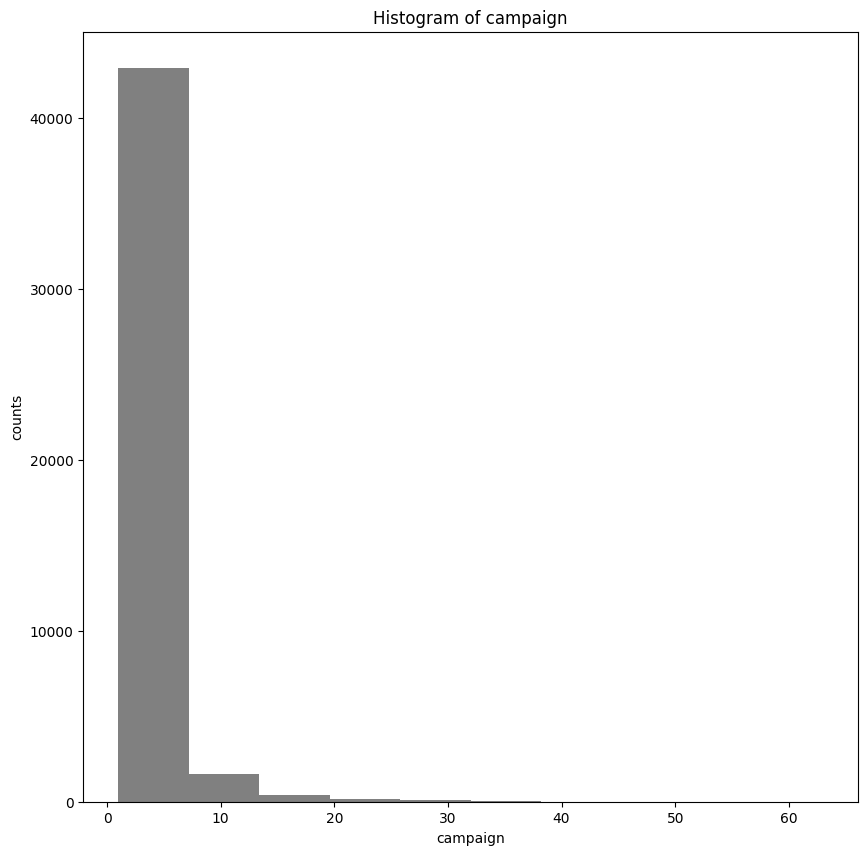

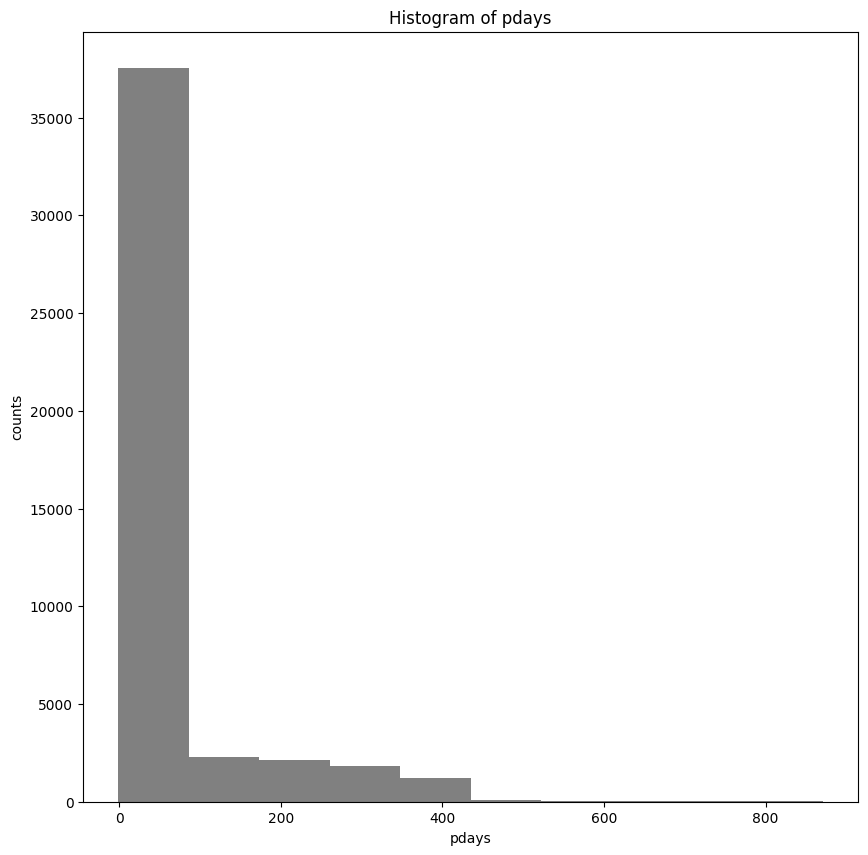

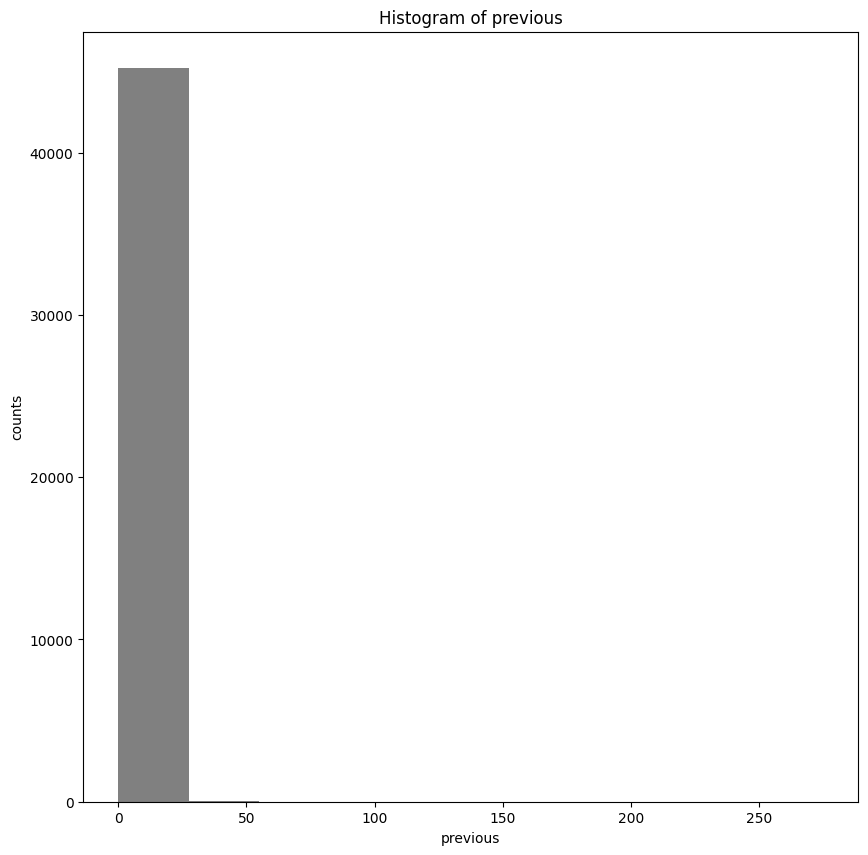

In [ ]:
columns_to_include = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
for column in data:
  if column in columns_to_include:
    histogram(data, column, 'Histogram of ' + column, column, 'counts')

### **Bivariate Analysis**

In [ ]:
# Function group barchart
def group_barchart(data, column):
  subscribe = data.groupby(['subscribe', column]).size().reset_index(name = 'counts')

  g = sns.catplot(
      data = subscribe, kind = "bar",
      x = 'subscribe', y = 'counts', hue = column,
      palette = "dark", height = 6
  )

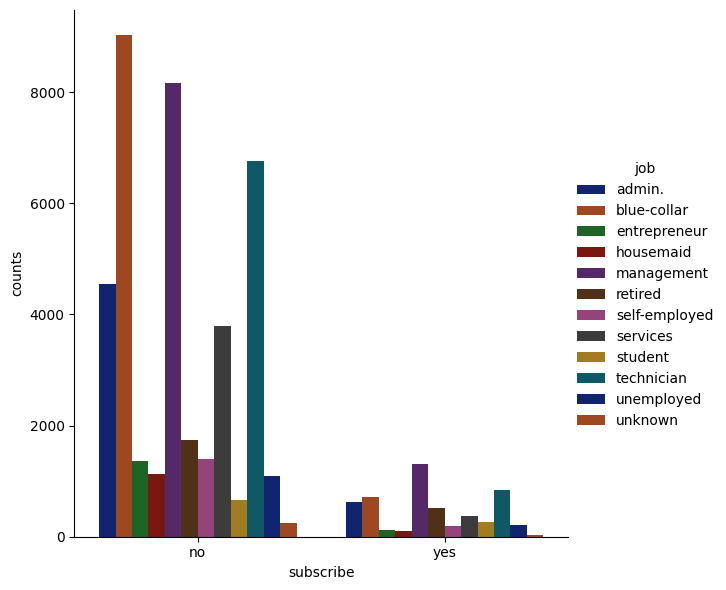

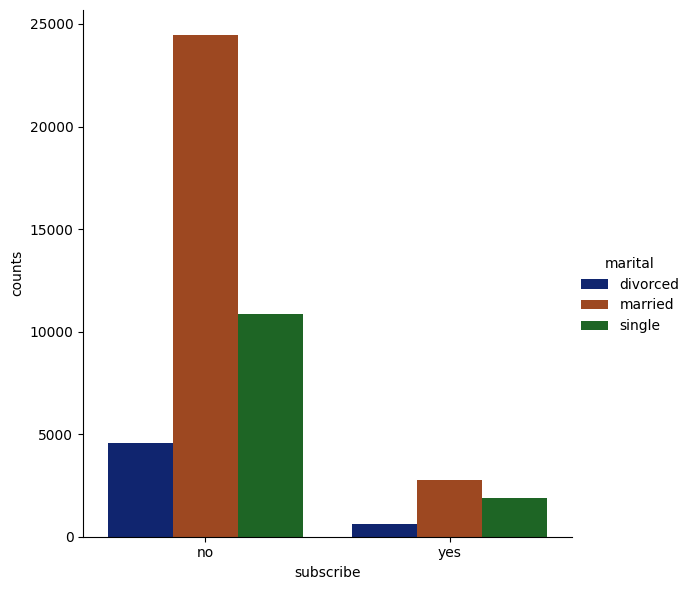

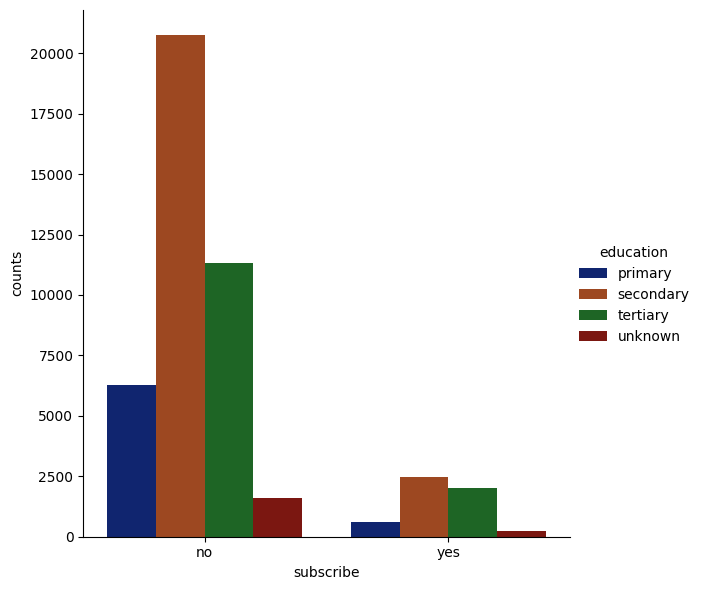

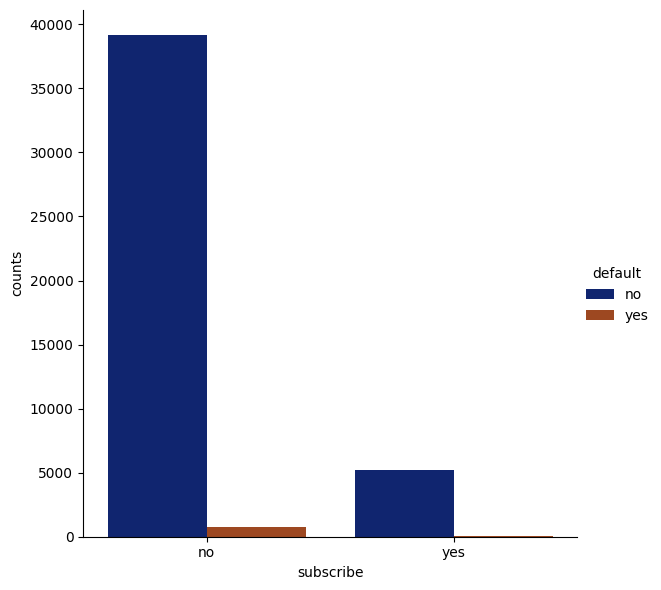

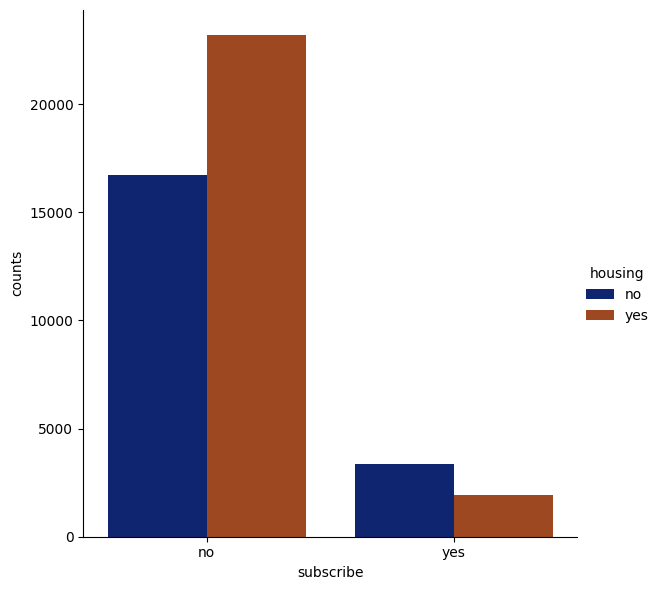

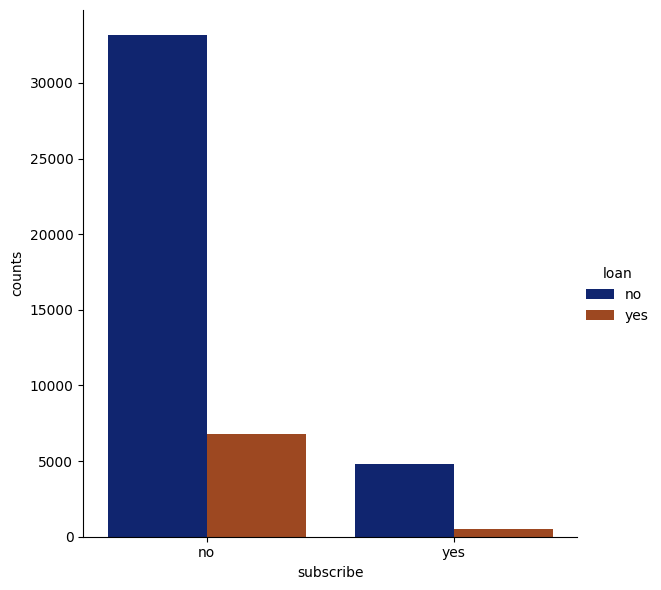

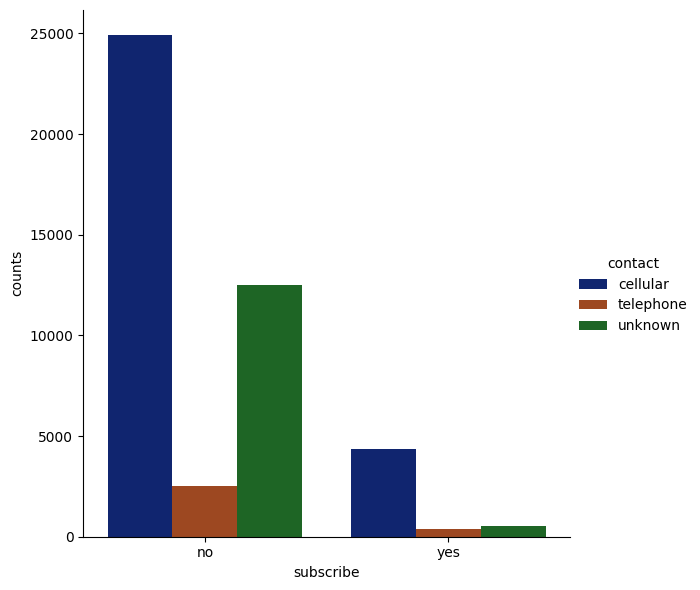

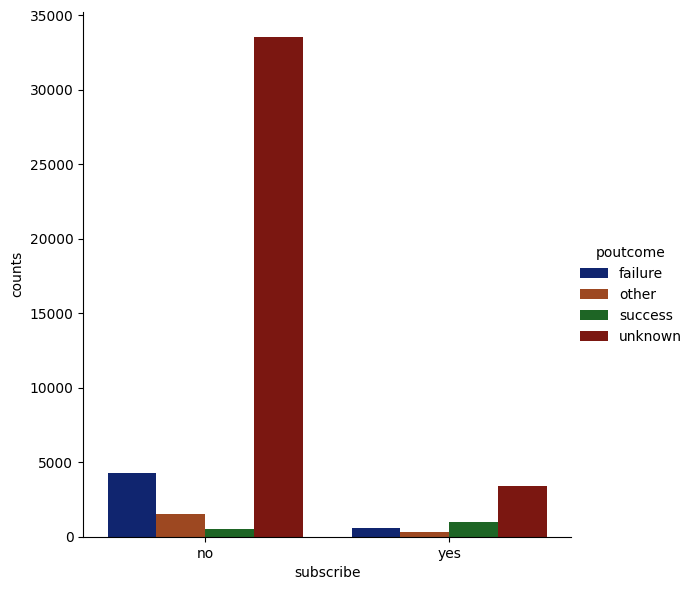

In [ ]:
columns_to_exclude = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'subscribe']
for column in data:
  if column not in columns_to_exclude:
    group_barchart(data, column)

In [ ]:
# Function for KDE plot
def kde_plot(data, column):
  facet = sns.FacetGrid(data, hue = 'subscribe', aspect = 4)
  facet.map(sns.kdeplot, column, fill = True)
  facet.add_legend()
  plt.show()

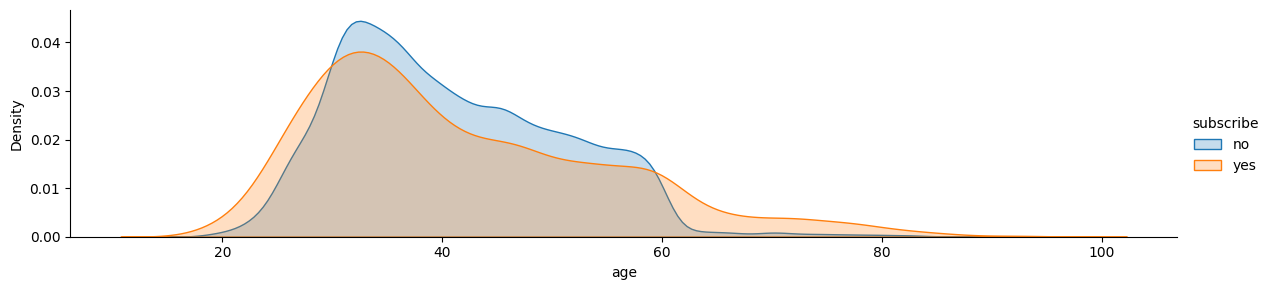

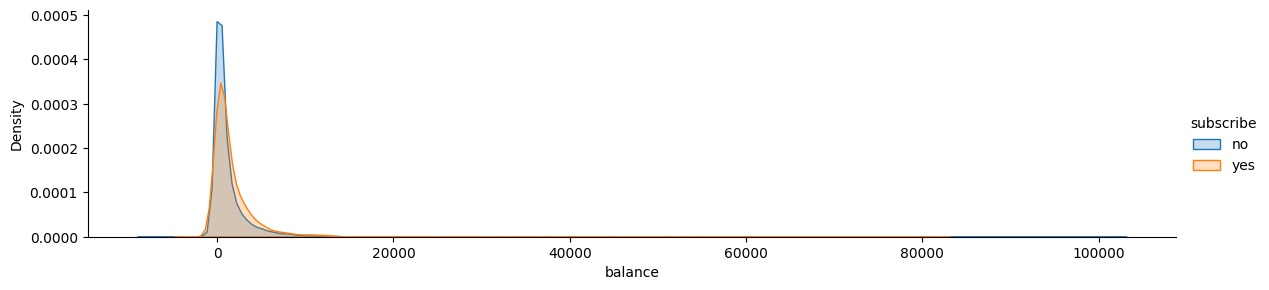

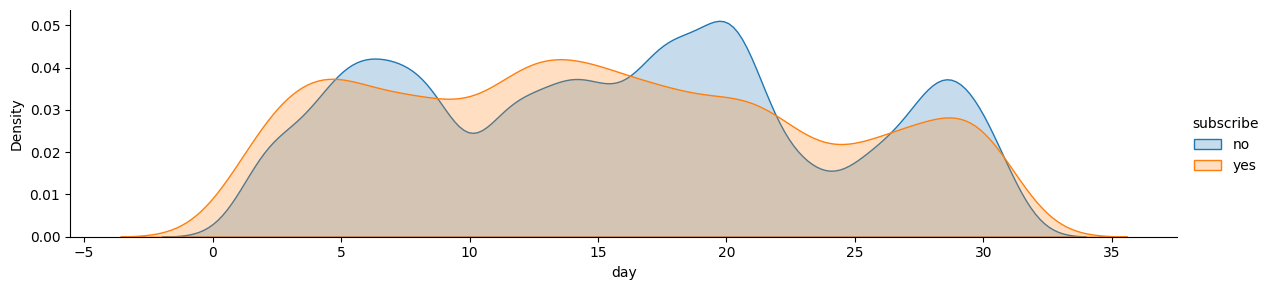

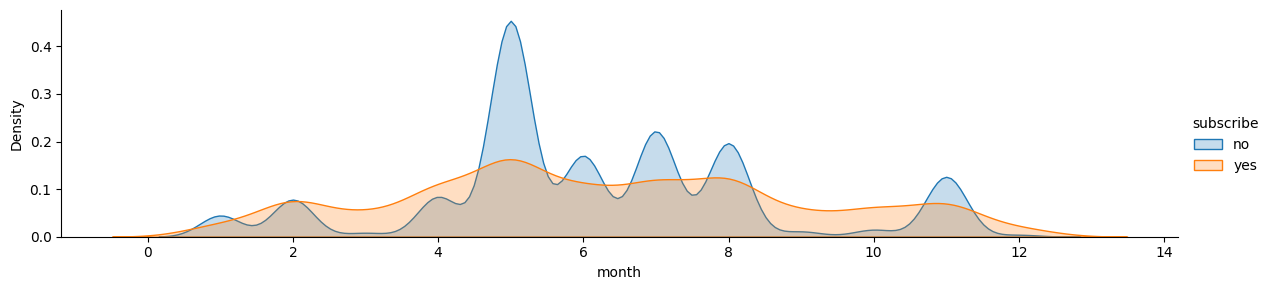

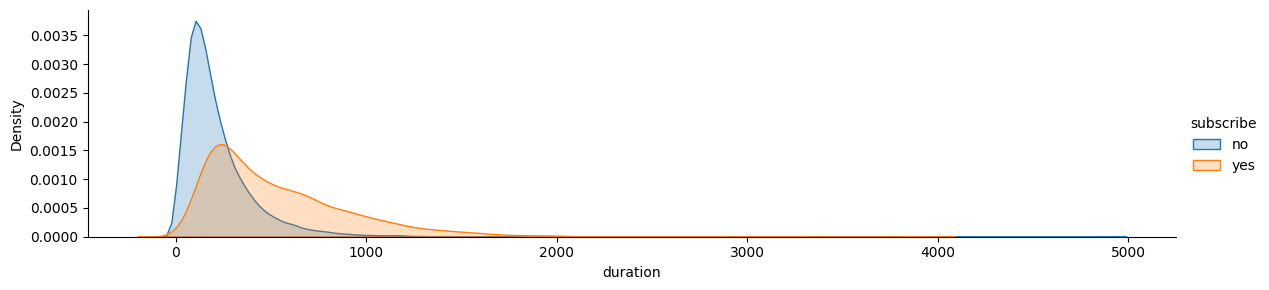

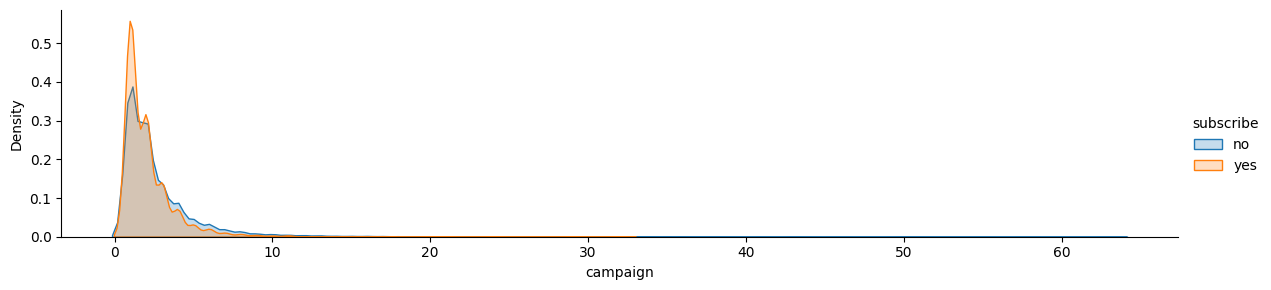

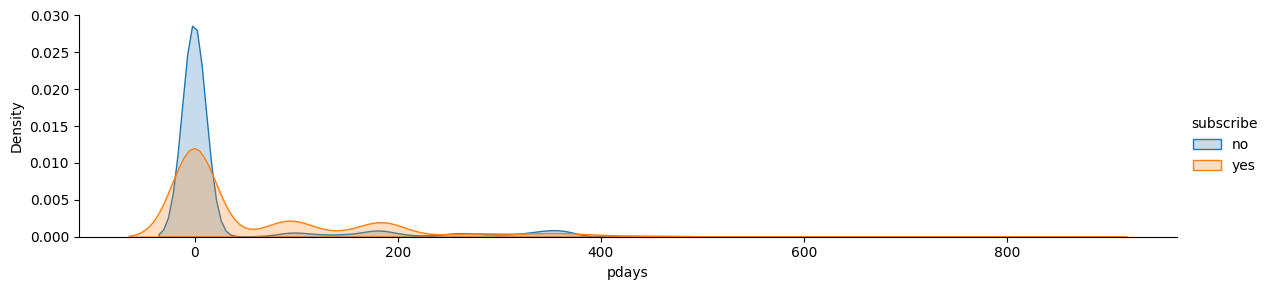

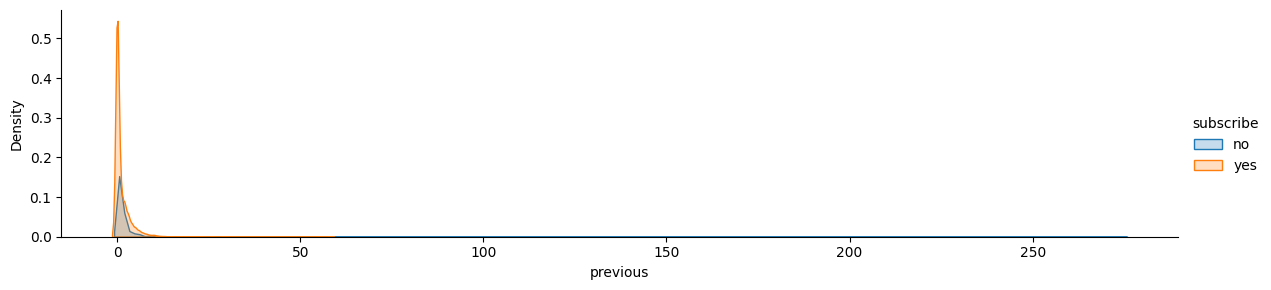

In [ ]:
columns_to_include = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
for column in data:
  if column in columns_to_include:
    kde_plot(data, column)

In [ ]:
# function to check correlation on categorical attributes
from scipy.stats import chi2_contingency

def chi_square_test(data, categorical_column):
    # Membuat tabel kontingensi antara variabel target dan atribut kategorikal
    contingency_table = pd.crosstab(data['subscribe'], data[categorical_column])

    # Melakukan uji chi-square
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print("\nChi-square test for " + '''"''' + column + '''"''')
    print("Chi-square statistic:", chi2)
    print("p-value:", p)
    print("Degrees of freedom:", dof)
    print("Expected frequencies table:")
    print(expected)



In [ ]:
columns_to_exclude = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'subscribe']
for column in data:
  if column not in columns_to_exclude:
     chi_square_test(data, column)

# p-value paling besar dan chi-square paling kecil adalah atribut yg paling TIDAK BERPENGARUH


Chi-square test for "job"
Chi-square statistic: 836.1054877471965
p-value: 3.337121944935502e-172
Degrees of freedom: 11
Expected frequencies table:
[[4566.0715755  8593.5038818  1313.04359559 1094.93884232 8351.55771825
  1999.14640242 1394.28099356 3668.04512176  828.2682533  6708.26643958
  1150.56879963  254.30837628]
 [ 604.9284245  1138.4961182   173.95640441  145.06115768 1106.44228175
   264.85359758  184.71900644  485.95487824  109.7317467   888.73356042
   152.43120037   33.69162372]]

Chi-square test for "marital"
Chi-square statistic: 196.4959456560396
p-value: 2.1450999986791486e-43
Degrees of freedom: 2
Expected frequencies table:
[[ 4597.86012254 24030.37552808 11293.76434938]
 [  609.13987746  3183.62447192  1496.23565062]]

Chi-square test for "education"
Chi-square statistic: 238.92350616407606
p-value: 1.6266562124072994e-51
Degrees of freedom: 3
Expected frequencies table:
[[ 6049.5371038  20487.71856407 11744.98511424  1639.75921789]
 [  801.4628962   2714.2814359

In [ ]:
# function to check correlation on numerical attributes
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova(data, numerical_column):
    model = ols('{} ~ C({})'.format(numerical_column, 'subscribe'), data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\nAnova test for " + '''"''' + column + '''"''')
    print(anova_table)


In [ ]:
columns_to_include = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
for column in data:
  if column in columns_to_include:
     anova(data, column)

# F paling rendah dan PR paling tinggi adalah atribut yg paling TIDAK BERPENGARUH


Anova test for "age"
                    sum_sq       df          F        PR(>F)
C(subscribe)  3.225756e+03      1.0  28.625233  8.825644e-08
Residual      5.094568e+06  45209.0        NaN           NaN

Anova test for "balance"
                    sum_sq       df           F        PR(>F)
C(subscribe)  1.170151e+09      1.0  126.572276  2.521114e-29
Residual      4.179536e+11  45209.0         NaN           NaN

Anova test for "day"
                    sum_sq       df         F        PR(>F)
C(subscribe)  2.516388e+03      1.0  36.35901  1.653880e-09
Residual      3.128891e+06  45209.0       NaN           NaN

Anova test for "month"
                     sum_sq       df          F    PR(>F)
C(subscribe)      91.840436      1.0  15.843506  0.000069
Residual      262064.115460  45209.0        NaN       NaN

Anova test for "duration"
                    sum_sq       df            F  PR(>F)
C(subscribe)  4.666842e+08      1.0  8333.761148     0.0
Residual      2.531669e+09  45209.0       

## **Data Cleaning**

### **Missing Value Analysis**

> Visualisasi tabel DataFrame menunjukkan terdapat value yang "unknown" yang seharusnya merupakan null value. Akan tetapi pengecekan null dengan  `data.isnull().sum()` menunjukkan bahwa tidak terdapat perolehan jumlah data null sama sekali.

In [ ]:
# Melihat Apakah Terdapat Nilai Null dalam Datasets
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

In [ ]:
data['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

> Maka dari itu, penggantian nilai "unknown" menjadi NaN dilakukan untuk memeriksa kembali berapa banyak data null yang muncul.

In [ ]:
# mengganti value unknown menjadi null
data = data.replace('unknown', pd.NA)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  subscribe  45211 non-null  object
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [ ]:
data.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
subscribe        0
dtype: int64

> Hasil pengecekan ulang menunjukkan bahwa terdapat 4 atribut dengan perolehan nilai null. Oleh karena atribut `poutcome` mengandung lebih dari 50% nilai null, maka atribut ini dapat di*drop*.

In [ ]:
##lebih dari 50% data null, maka kolom dihapus
data = data.drop(columns = ['poutcome'])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribe
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,5,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,5,76,1,-1,0,no
3,47,blue-collar,married,<NA>,no,1506,yes,no,NaN,5,5,92,1,-1,0,no
4,33,<NA>,single,<NA>,no,1,no,no,NaN,5,5,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,no


> Oleh karena atribut tersisa yang mengandung null bertipe data categorical, maka missing values dapat diselesaikan dengan memberikan nilai melalui modus pada setiap kolom.

In [ ]:
# memberikan nilai pada baris kosong
def handle_missing_values(data, column_name):
  var_max = data[column_name].value_counts().idxmax()
  data[column_name] = data[column_name].fillna(var_max)
  return data

> 1. Fungsi ini menghitung frekuensi kemunculan setiap nilai dalam kolom yang ditentukan `(column_name)` menggunakan metode `value_counts()`. `idxmax()` digunakan untuk mengambil modus dari kolom tersebut. Nilai modus ini disimpan dalam variabel `var_max`.
2. Kemudian mengganti *missing values* (NaN) dalam kolom tersebut dengan modus yang telah dihitung sebelumnya `(var_max)`. Ini dilakukan dengan menggunakan metode `fillna()` dari Pandas, yang mengganti setiap nilai yang hilang dalam kolom dengan nilai yang disediakan.
3. Fungsi akan mengembalikan DataFrame yang telah diperbarui dengan *missing values* telah teratasi.

In [ ]:
handle_missing_values(data, 'job')
handle_missing_values(data, 'education')
handle_missing_values(data, 'contact')
data.isnull().sum()
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribe
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,5,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,5,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,5,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,5,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,no


> Pengecekan kembali dilakukan untuk memastikan bahwa semua *missing values* telah teratasi.

### **Duplicate Data Check**

In [ ]:
# Mencari Duplikasi Data
jumlah_baris_duplikat = data.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

Jumlah baris yang memiliki data sama: 0 baris


### **Outlier Analysis**

#### **Box Plot - Before**

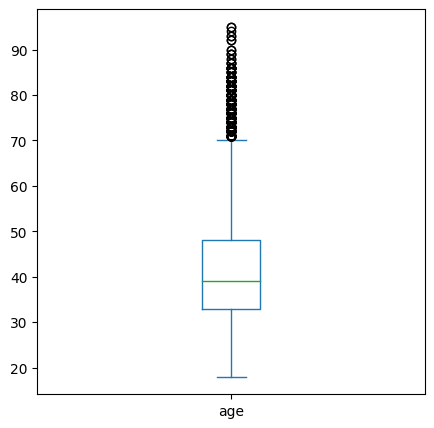

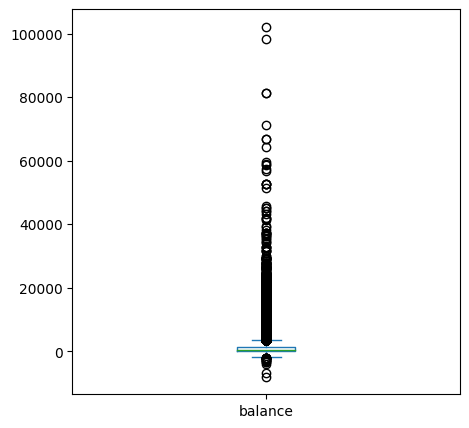

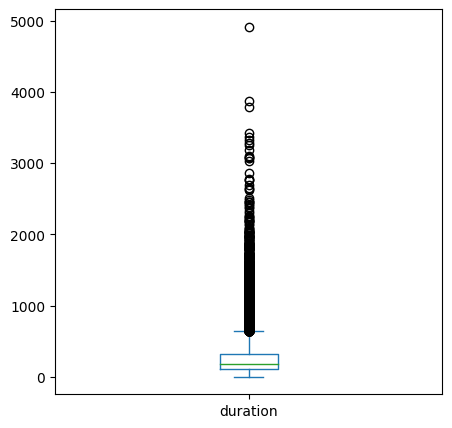

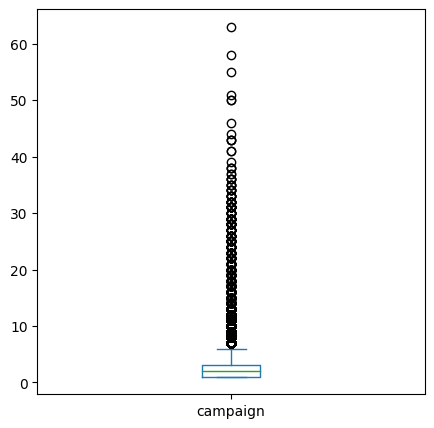

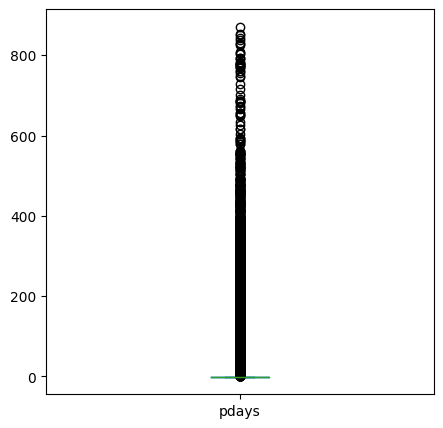

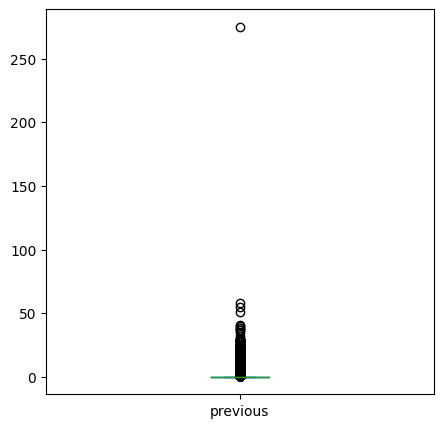

In [ ]:
# Box Plot
plt.figure(figsize = (5, 5))
data['age'].plot(kind="box")
plt.show()

plt.figure(figsize = (5, 5))
data['balance'].plot(kind="box")
plt.show()

plt.figure(figsize = (5, 5))
data['duration'].plot(kind="box")
plt.show()

plt.figure(figsize = (5, 5))
data['campaign'].plot(kind="box")
plt.show()

plt.figure(figsize = (5, 5))
data['pdays'].plot(kind="box")
plt.show()

plt.figure(figsize = (5, 5))
data['previous'].plot(kind="box")
plt.show()

#### **Histogram - Before**

Text(0.5, 1.0, 'Previous')

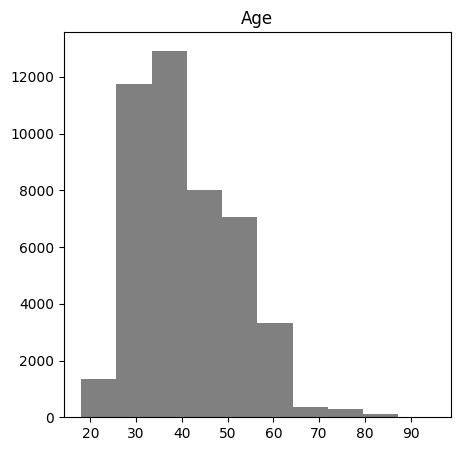

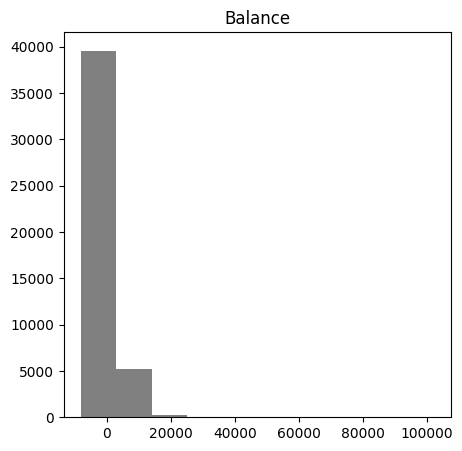

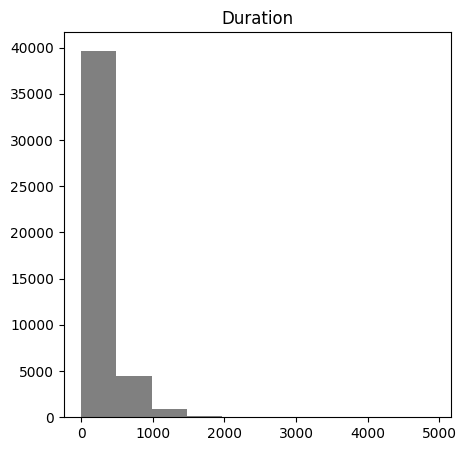

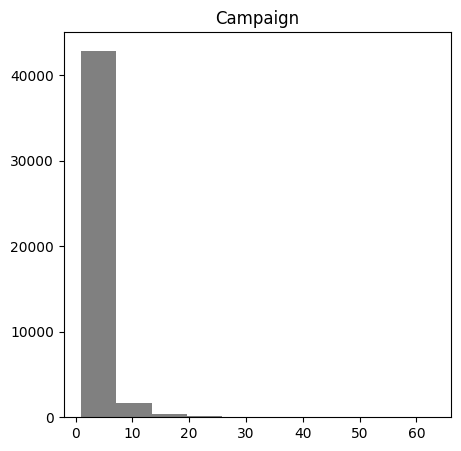

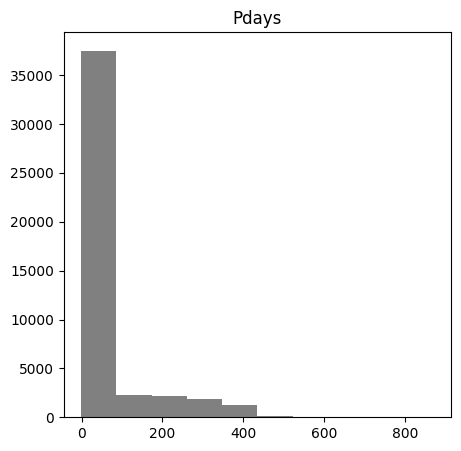

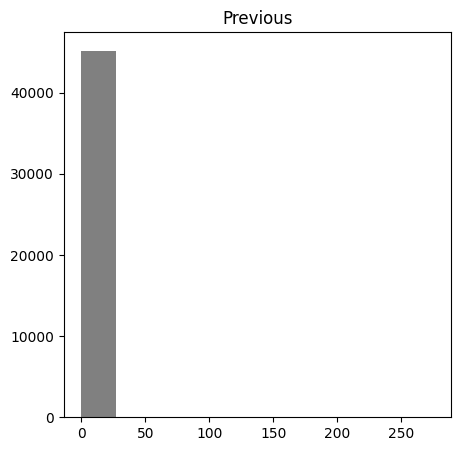

In [ ]:
# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data["age"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Age")  # Judul visualisasi

# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data["balance"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Balance")  # Judul visualisasi

# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data["duration"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Duration")  # Judul visualisasi

# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data["campaign"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Campaign")  # Judul visualisasi

# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data["pdays"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Pdays")  # Judul visualisasi

# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data["previous"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Previous")  # Judul visualisasi

#### **Z-Score**

In [ ]:
from scipy import stats
data['z_score_age'] = stats.zscore(data['age'])

data['z_score_balance'] = stats.zscore(data['balance'])

data['z_score_duration'] = stats.zscore(data['duration'])

data['z_score_campaign'] = stats.zscore(data['campaign'])

data['z_score_pdays'] = stats.zscore(data['pdays'])

data['z_score_previous'] = stats.zscore(data['previous'])

data.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,subscribe,z_score_age,z_score_balance,z_score_duration,z_score_campaign,z_score_pdays,z_score_previous
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,...,1,-1,0,no,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.25194
1,44,technician,single,secondary,no,29,yes,no,cellular,5,...,1,-1,0,no,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.25194
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,...,1,-1,0,no,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.25194
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,...,1,-1,0,no,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.25194
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,...,1,-1,0,no,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.25194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,cellular,5,...,1,-1,0,no,-0.464863,-0.414247,0.651731,-0.569351,-0.411453,-0.25194
96,55,blue-collar,married,secondary,no,383,no,no,cellular,5,...,1,-1,0,no,1.324443,-0.321628,0.111977,-0.569351,-0.411453,-0.25194
97,60,retired,married,tertiary,no,81,yes,no,cellular,5,...,1,-1,0,no,1.795313,-0.420816,-0.610283,-0.569351,-0.411453,-0.25194
98,39,technician,married,secondary,no,0,yes,no,cellular,5,...,1,-1,0,no,-0.182341,-0.447419,-0.214205,-0.569351,-0.411453,-0.25194


In [ ]:
data['z_score_age'].describe() ##2

count    4.521100e+04
mean     2.112250e-16
std      1.000011e+00
min     -2.159994e+00
25%     -7.473845e-01
50%     -1.823406e-01
75%      6.652252e-01
max      5.091402e+00
Name: z_score_age, dtype: float64

In [ ]:
data['z_score_balance'].describe() ##2

count    4.521100e+04
mean     1.760208e-17
std      1.000011e+00
min     -3.081149e+00
25%     -4.237719e-01
50%     -3.002800e-01
75%      2.158743e-02
max      3.309478e+01
Name: z_score_balance, dtype: float64

In [ ]:
data['z_score_duration'].describe() ##1

count    4.521100e+04
mean     6.035001e-17
std      1.000011e+00
min     -1.002478e+00
25%     -6.025167e-01
50%     -3.035165e-01
75%      2.362370e-01
max      1.809470e+01
Name: z_score_duration, dtype: float64

In [ ]:
data['z_score_campaign'].describe() ##1

count    4.521100e+04
mean     3.017500e-17
std      1.000011e+00
min     -5.693506e-01
25%     -5.693506e-01
50%     -2.465603e-01
75%      7.622994e-02
max      1.944365e+01
Name: z_score_campaign, dtype: float64

In [ ]:
data['z_score_pdays'].describe() ##1

count    4.521100e+04
mean     2.011667e-17
std      1.000011e+00
min     -4.114531e-01
25%     -4.114531e-01
50%     -4.114531e-01
75%     -4.114531e-01
max      8.297431e+00
Name: z_score_pdays, dtype: float64

In [ ]:
data['z_score_previous'].describe() ##2

count    4.521100e+04
mean     4.023334e-17
std      1.000011e+00
min     -2.519404e-01
25%     -2.519404e-01
50%     -2.519404e-01
75%     -2.519404e-01
max      1.191360e+02
Name: z_score_previous, dtype: float64

#### **Removing Outliers**

In [ ]:
# remove outliers
threshold = 2
data_no_outliers = data.loc[data['z_score_age'].abs() < threshold]
data_no_outliers = data_no_outliers.reset_index(drop=True)

threshold = 2
data_no_outliers = data_no_outliers.loc[data_no_outliers['z_score_balance'].abs() < threshold]
data_no_outliers = data_no_outliers.reset_index(drop=True)

threshold = 1
data_no_outliers = data_no_outliers.loc[data_no_outliers['z_score_duration'].abs() < threshold]
data_no_outliers = data_no_outliers.reset_index(drop=True)

threshold = 1
data_no_outliers = data_no_outliers.loc[data_no_outliers['z_score_campaign'].abs() < threshold]
data_no_outliers = data_no_outliers.reset_index(drop=True)

threshold = 1
data_no_outliers = data_no_outliers.loc[data_no_outliers['z_score_pdays'].abs() < threshold]
data_no_outliers = data_no_outliers.reset_index(drop=True)

threshold = 2
data_no_outliers = data_no_outliers.loc[data_no_outliers['z_score_previous'].abs() < threshold]
data_no_outliers = data_no_outliers.reset_index(drop=True)

In [ ]:
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29158 entries, 0 to 29157
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               29158 non-null  int64  
 1   job               29158 non-null  object 
 2   marital           29158 non-null  object 
 3   education         29158 non-null  object 
 4   default           29158 non-null  object 
 5   balance           29158 non-null  int64  
 6   housing           29158 non-null  object 
 7   loan              29158 non-null  object 
 8   contact           29158 non-null  object 
 9   day               29158 non-null  int64  
 10  month             29158 non-null  int64  
 11  duration          29158 non-null  int64  
 12  campaign          29158 non-null  int64  
 13  pdays             29158 non-null  int64  
 14  previous          29158 non-null  int64  
 15  subscribe         29158 non-null  object 
 16  z_score_age       29158 non-null  float6

In [ ]:
data_no_outliers.tail(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,subscribe,z_score_age,z_score_balance,z_score_duration,z_score_campaign,z_score_pdays,z_score_previous
29108,57,unemployed,divorced,primary,no,282,no,no,cellular,22,...,1,88,4,no,1.512791,-0.354800,0.783757,-0.569351,0.477412,1.484611
29109,33,admin.,single,tertiary,no,146,no,no,cellular,22,...,1,91,3,yes,-0.747384,-0.399468,0.473107,-0.569351,0.507374,1.050473
29110,61,retired,married,primary,no,2686,no,no,telephone,22,...,3,-1,0,no,1.889487,0.434760,-0.676296,0.076230,-0.411453,-0.251940
29111,30,management,single,tertiary,no,985,yes,no,cellular,25,...,1,94,2,yes,-1.029906,-0.123910,0.177990,-0.569351,0.537336,0.616335
29112,34,blue-collar,married,secondary,no,152,no,no,cellular,25,...,1,-1,0,no,-0.653211,-0.397497,0.065380,-0.569351,-0.411453,-0.251940
29113,36,technician,married,tertiary,no,844,yes,yes,cellular,25,...,1,-1,0,no,-0.464863,-0.170219,-0.501556,-0.569351,-0.411453,-0.251940
29114,24,student,single,secondary,no,1234,no,no,telephone,26,...,2,97,3,no,-1.594950,-0.042129,0.084795,-0.246560,0.567298,1.050473
29115,26,management,single,tertiary,no,222,no,no,cellular,26,...,1,120,3,yes,-1.406602,-0.374507,0.232354,-0.569351,0.797004,1.050473
29116,30,management,single,tertiary,no,565,yes,no,cellular,26,...,1,-1,0,no,-1.029906,-0.261853,-0.598634,-0.569351,-0.411453,-0.251940
29117,25,student,single,secondary,no,1868,no,no,cellular,26,...,1,103,2,yes,-1.500776,0.166099,0.003250,-0.569351,0.627221,0.616335


#### **Box Plot - After**

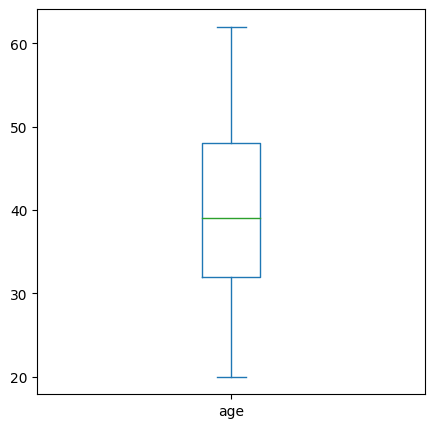

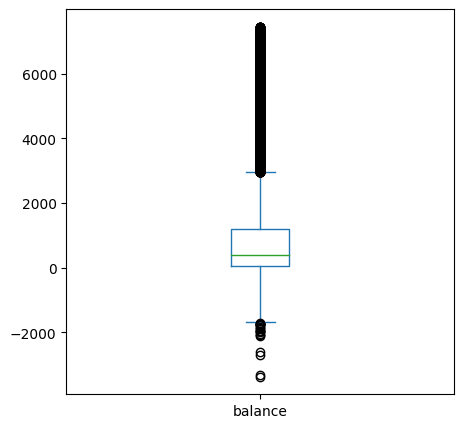

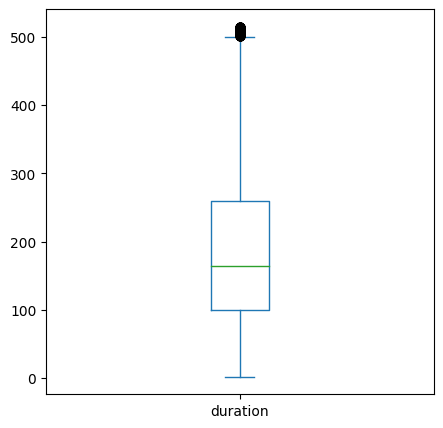

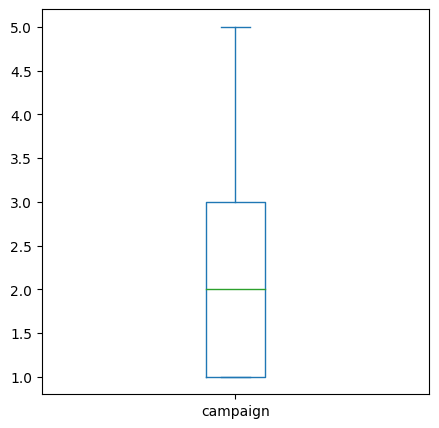

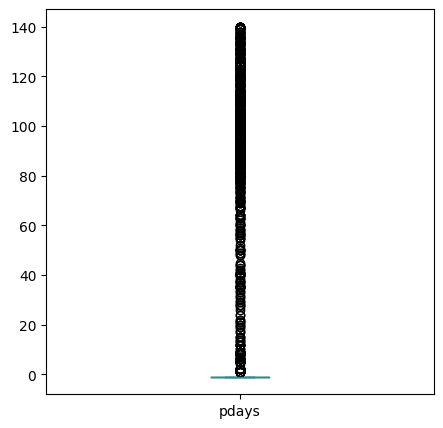

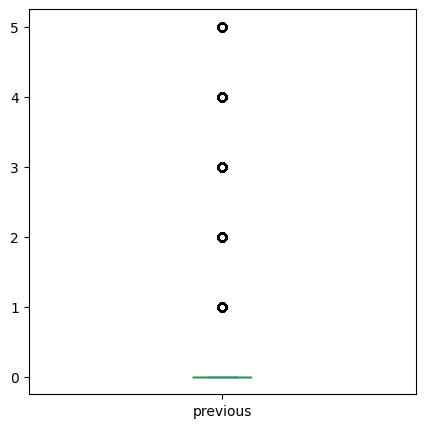

In [ ]:
# Box Plot Setelah Outlier dihapus
plt.figure(figsize = (5, 5))
data_no_outliers['age'].plot(kind="box")
plt.show()

plt.figure(figsize = (5, 5))
data_no_outliers['balance'].plot(kind="box")
plt.show()

plt.figure(figsize = (5, 5))
data_no_outliers['duration'].plot(kind="box")
plt.show()

plt.figure(figsize = (5, 5))
data_no_outliers['campaign'].plot(kind="box")
plt.show()

plt.figure(figsize = (5, 5))
data_no_outliers['pdays'].plot(kind="box")
plt.show()

plt.figure(figsize = (5, 5))
data_no_outliers['previous'].plot(kind="box")
plt.show()

#### **Histogram - After**

Text(0.5, 1.0, 'Previous')

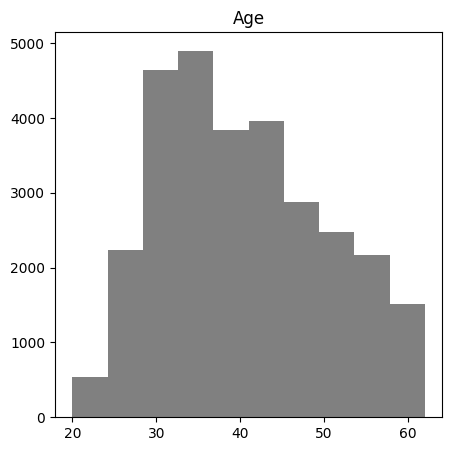

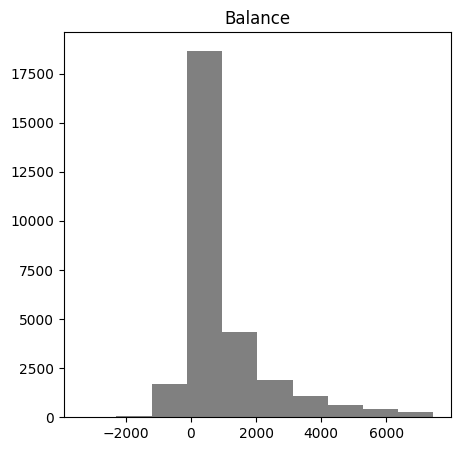

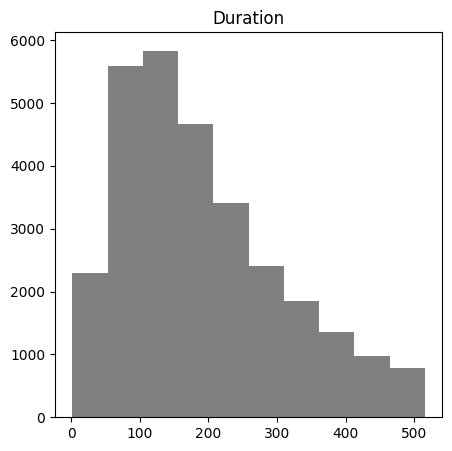

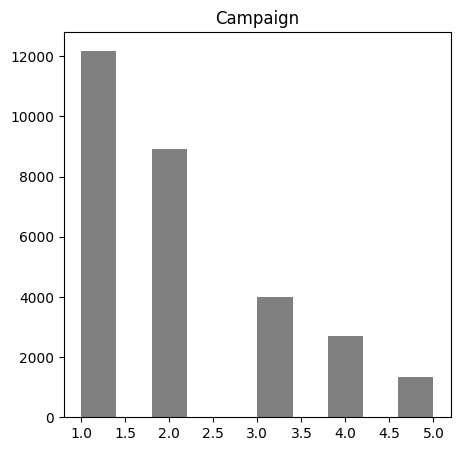

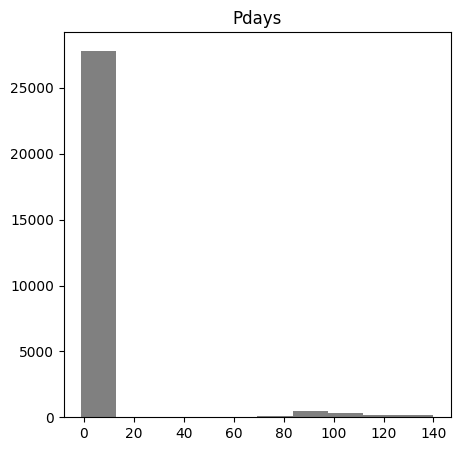

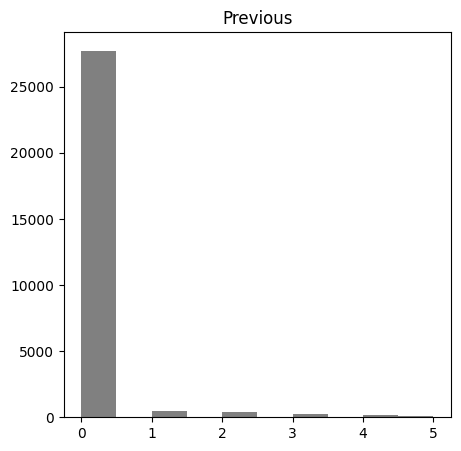

In [ ]:
# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data_no_outliers["age"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Age")  # Judul visualisasi

# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data_no_outliers["balance"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Balance")  # Judul visualisasi

# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data_no_outliers["duration"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Duration")  # Judul visualisasi

# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data_no_outliers["campaign"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Campaign")  # Judul visualisasi

# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data_no_outliers["pdays"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Pdays")  # Judul visualisasi

# menampilkan histogram custom
plt.figure(figsize = (5, 5))  # Ukuran gambar
x = data_no_outliers["previous"]  # Data yang ingin divisualisasikan
plt.hist(x, color = "grey")  # Jenis visualisasi, dengan argument tambahan untuk memberi warna
plt.title("Previous")  # Judul visualisasi

###**Categorical Encoding**

####**One Hot Encoding**

In [ ]:
# Menyimpan data sebelum encoding ke variabel dc
dc = data_no_outliers.copy()

categorical_cols = ['job','marital', 'education', 'contact']
dc_encoded = pd.get_dummies(dc, columns = categorical_cols)
dc_encoded = dc_encoded.replace({False: 0, True: 1})
dc_encoded

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,58,no,2143,yes,no,5,5,261,1,-1,...,0,0,0,1,0,0,0,1,1,0
1,44,no,29,yes,no,5,5,151,1,-1,...,1,0,0,0,1,0,1,0,1,0
2,33,no,2,yes,yes,5,5,76,1,-1,...,0,0,0,1,0,0,1,0,1,0
3,47,no,1506,yes,no,5,5,92,1,-1,...,0,0,0,1,0,0,1,0,1,0
4,33,no,1,no,no,5,5,198,1,-1,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29153,37,no,1428,no,no,16,11,333,2,-1,...,0,0,0,1,0,0,0,1,1,0
29154,34,no,557,no,no,17,11,224,1,-1,...,0,0,0,0,1,0,1,0,1,0
29155,23,no,113,no,no,17,11,266,1,-1,...,0,0,0,0,1,0,0,1,1,0
29156,25,no,505,no,yes,17,11,386,2,-1,...,1,0,0,0,1,0,1,0,1,0


####**Label Encoding**

In [ ]:
dc_encoded['default'] = dc_encoded['default'].astype('category').cat.codes
dc_encoded['housing'] = dc_encoded['housing'].astype('category').cat.codes
dc_encoded['loan'] = dc_encoded['loan'].astype('category').cat.codes
dc_encoded['subscribe'] = dc_encoded['subscribe'].astype('category').cat.codes

dc_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29158 entries, 0 to 29157
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  29158 non-null  int64  
 1   default              29158 non-null  int8   
 2   balance              29158 non-null  int64  
 3   housing              29158 non-null  int8   
 4   loan                 29158 non-null  int8   
 5   day                  29158 non-null  int64  
 6   month                29158 non-null  int64  
 7   duration             29158 non-null  int64  
 8   campaign             29158 non-null  int64  
 9   pdays                29158 non-null  int64  
 10  previous             29158 non-null  int64  
 11  subscribe            29158 non-null  int8   
 12  z_score_age          29158 non-null  float64
 13  z_score_balance      29158 non-null  float64
 14  z_score_duration     29158 non-null  float64
 15  z_score_campaign     29158 non-null 

###**Drop Unused Column**

In [ ]:
columns_to_drop = ['z_score_age',	'z_score_balance',	'z_score_duration',	'z_score_campaign',	'z_score_pdays',	'z_score_previous']
dc = dc.drop(columns=columns_to_drop)
dc_encoded = dc_encoded.drop(columns=columns_to_drop)

##**Exploratory Data After Cleaning**

### **Statistical Analysis**

In [ ]:
# menampilkan mean, standar deviasi, min, kuartil (25%, 50%, 75%) dan max (pandas)
dc.describe()

,age,balance,day,month,duration,campaign,pdays,previous
count,29158.000000,29158.000000,29158.000000,29158.000000,29158.000000,29158.000000,29158.000000,29158.000000
mean,40.302147,918.797243,15.682934,6.180191,190.023356,2.042458,3.461349,0.111153
std,9.712900,1398.763861,8.345396,2.297215,116.873224,1.156681,20.910614,0.563392
min,20.000000,-3372.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,51.250000,8.000000,5.000000,100.000000,1.000000,-1.000000,0.000000
50%,39.000000,387.000000,16.000000,6.000000,164.000000,2.000000,-1.000000,0.000000
75%,48.000000,1209.000000,21.000000,7.000000,260.000000,3.000000,-1.000000,0.000000
max,62.000000,7451.000000,31.000000,12.000000,515.000000,5.000000,140.000000,5.000000


### **Univariate Analysis**

In [ ]:
# Function to create Horizontal Barchart
def horizontal_barchart1(data, column, title, xlabel, ylabel, sizeX=12, sizeY=4):
  count = data[column].value_counts()

  index = count.index
  values = count.values

  fig, ax = plt.subplots(figsize=(sizeX, sizeY))
  bars = plt.barh(index, values, color="grey")

  plt.title(title)
  plt.xlabel(xlabel, labelpad=10)
  plt.ylabel(ylabel, labelpad=10)

  plt.xticks(rotation="vertical")

  for value, bar in zip(values, bars):
    ax.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center', fontsize=10)

  plt.show()

> 1. `value_counts()`: Menghitung jumlah kemunculan setiap nilai dalam kolom yang ditentukan untuk menentukan height setiap bar.
2. `index` dan `values`: Menyimpan indeks dan nilai-nilai hasil perhitungan sebelumnya.
3. `plt.barh()`: Membuat diagram batang horizontal dengan index sebagai label sumbu x dan values sebagai width setiap bar.
4. `ax.text()`: Menambahkan teks yang menunjukkan jumlah nilai di setiap bar.
5. `plt.title()`, `plt.xlabel()`, `plt.ylabel()`: Menambahkan judul diagram batang, label sumbu x, dan label sumbu y.
6. `plt.xticks(rotation="vertical")`: Memutar label sumbu x secara vertikal menggunakan plt.xticks(rotation="vertical").
7. Memanggil `plt.show()` untuk menampilkan diagram batang yang telah dibuat.

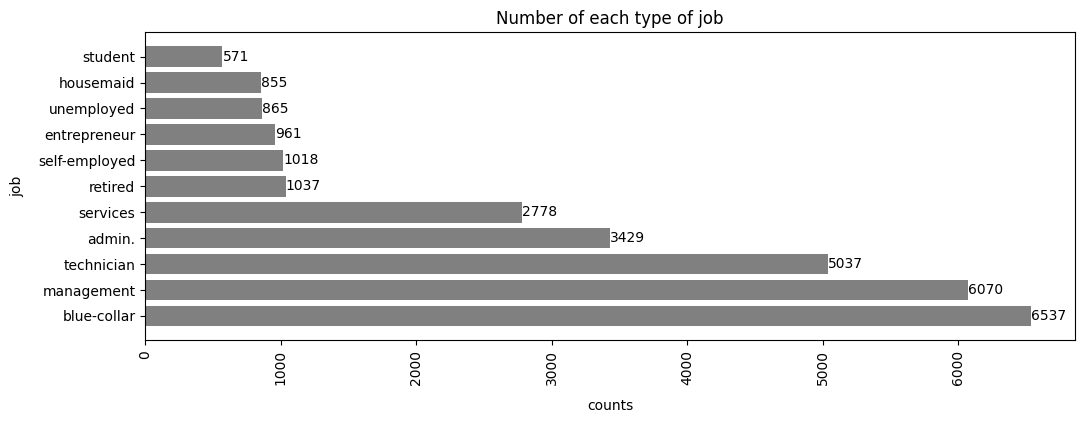

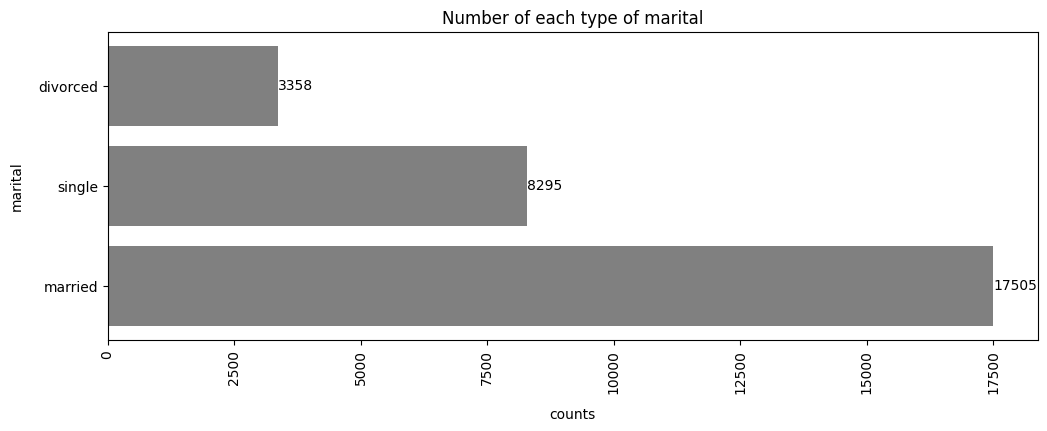

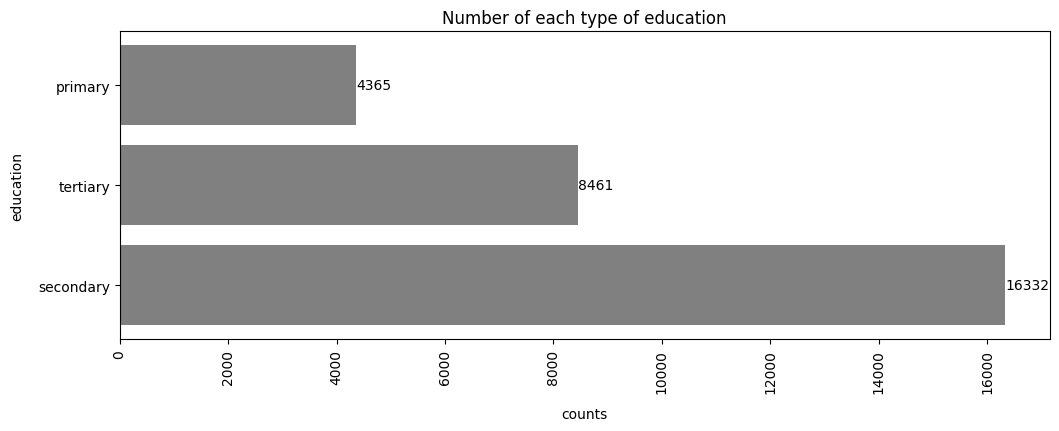

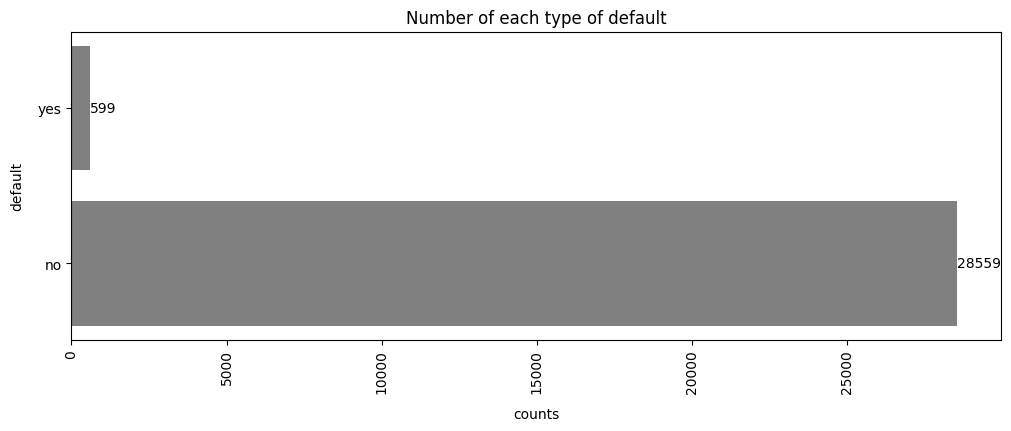

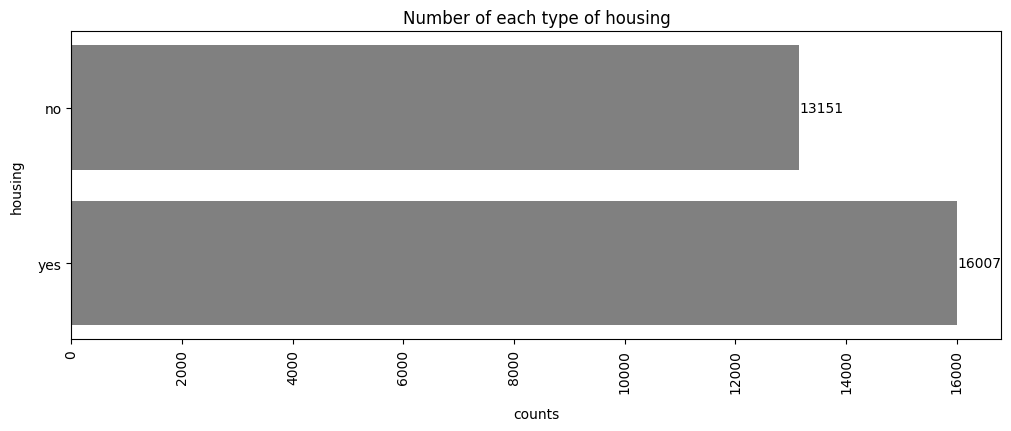

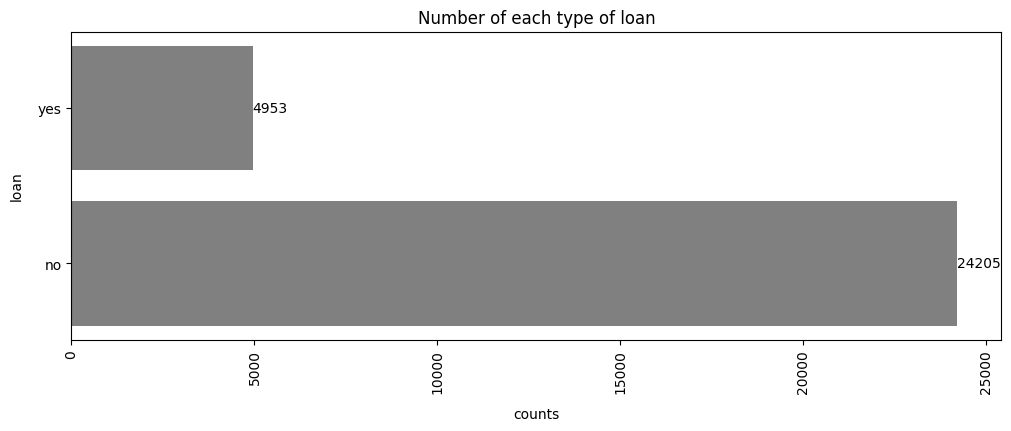

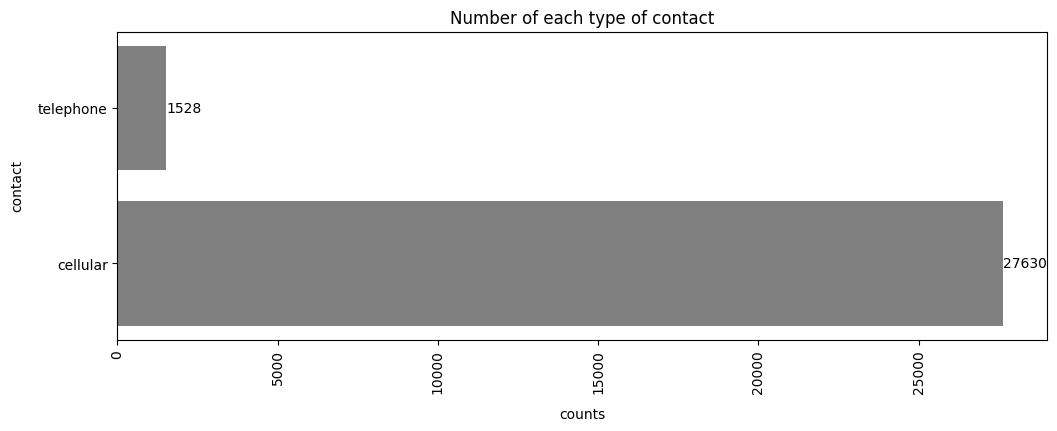

In [ ]:
# visualization for categorical attribute
columns_to_exclude = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'subscribe']
for column in dc:
  if column not in columns_to_exclude:
    horizontal_barchart1(dc, column, 'Number of each type of ' + column, 'counts', column)

In [ ]:
# function for histogram
def histogram(data, column, title, xlabel, ylabel):
  plt.figure(figsize = (10, 10))
  plt.hist(data[column], color = "grey")
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.subplots_adjust(hspace=0.5)
  plt.show()

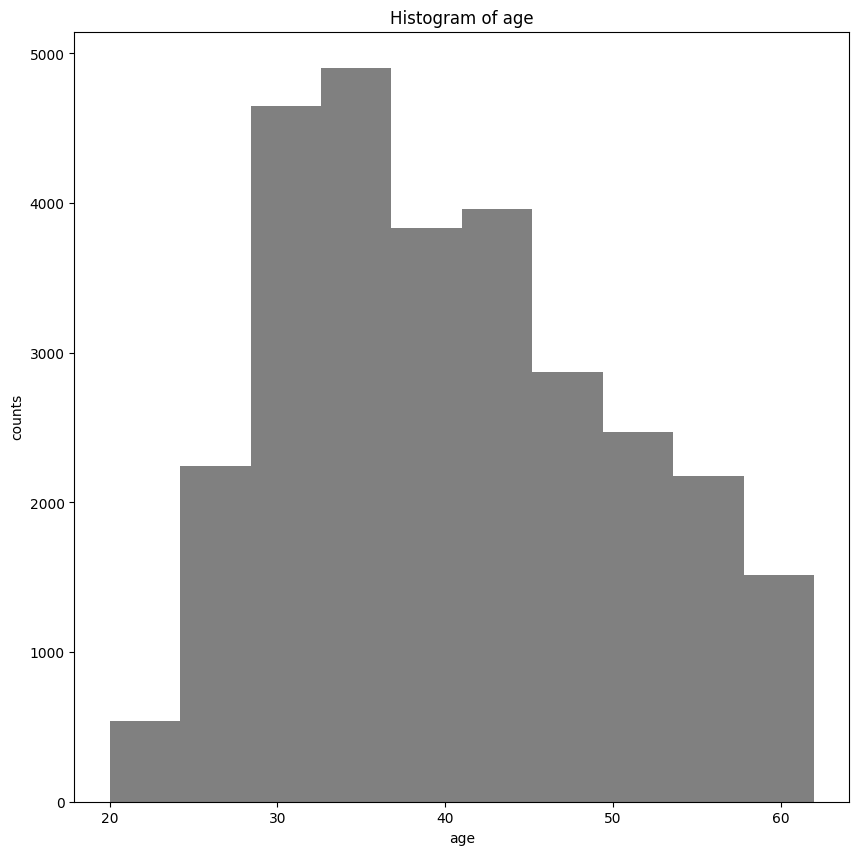

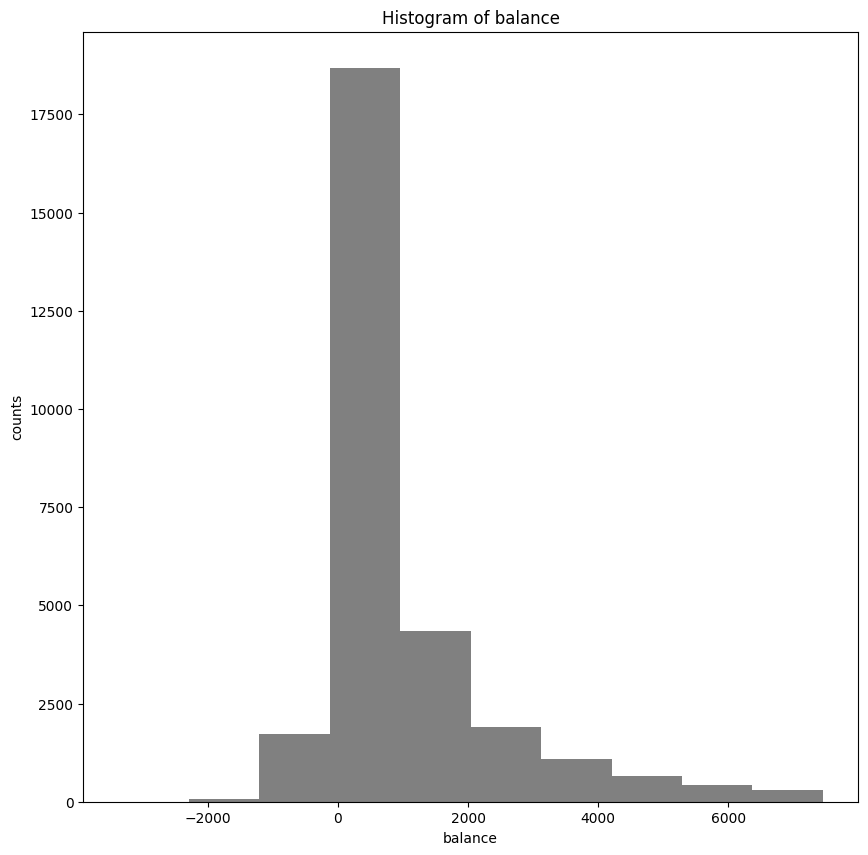

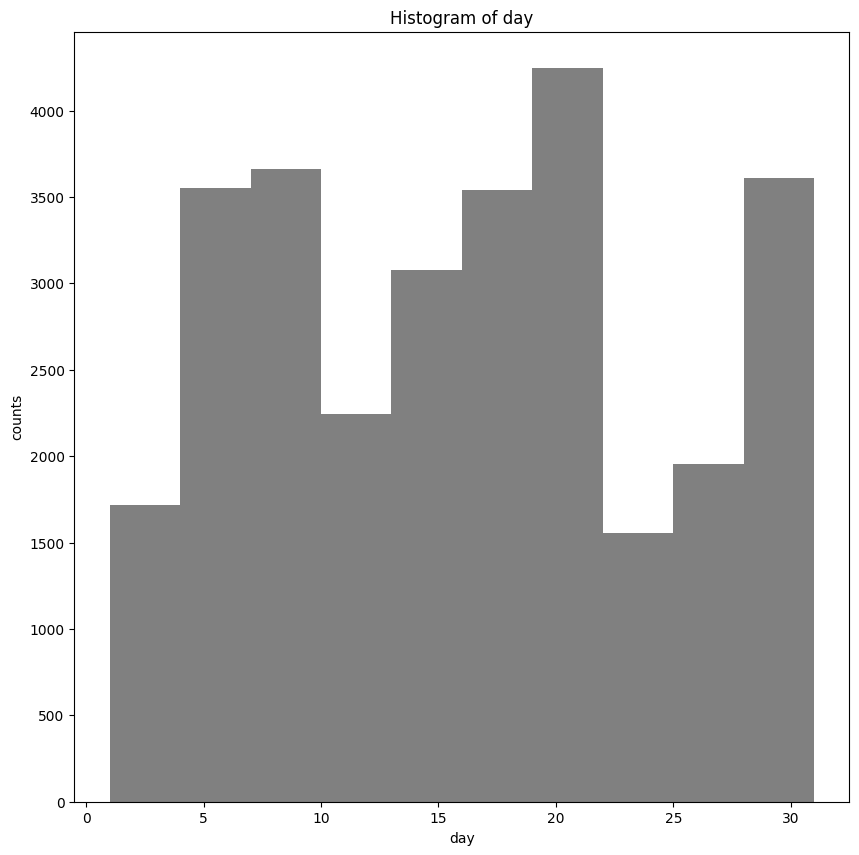

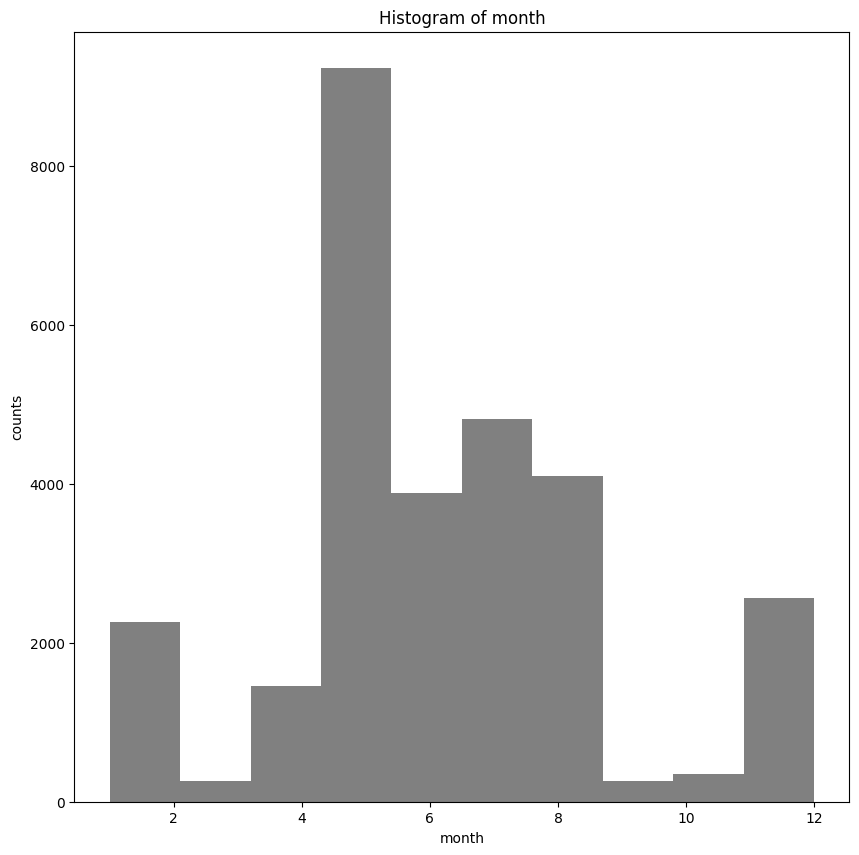

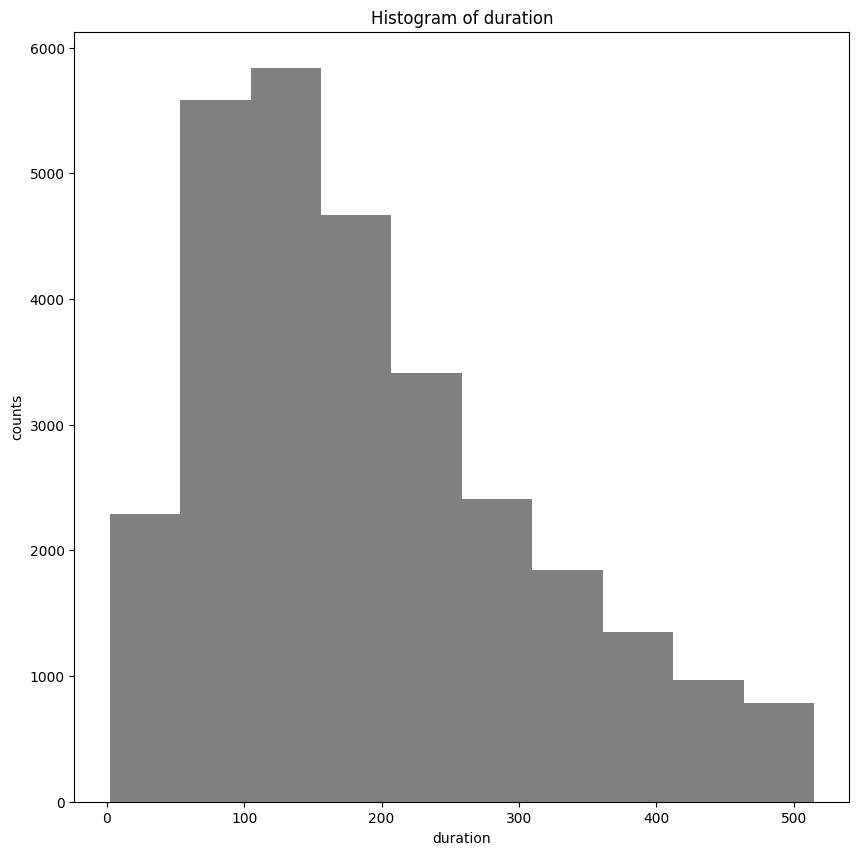

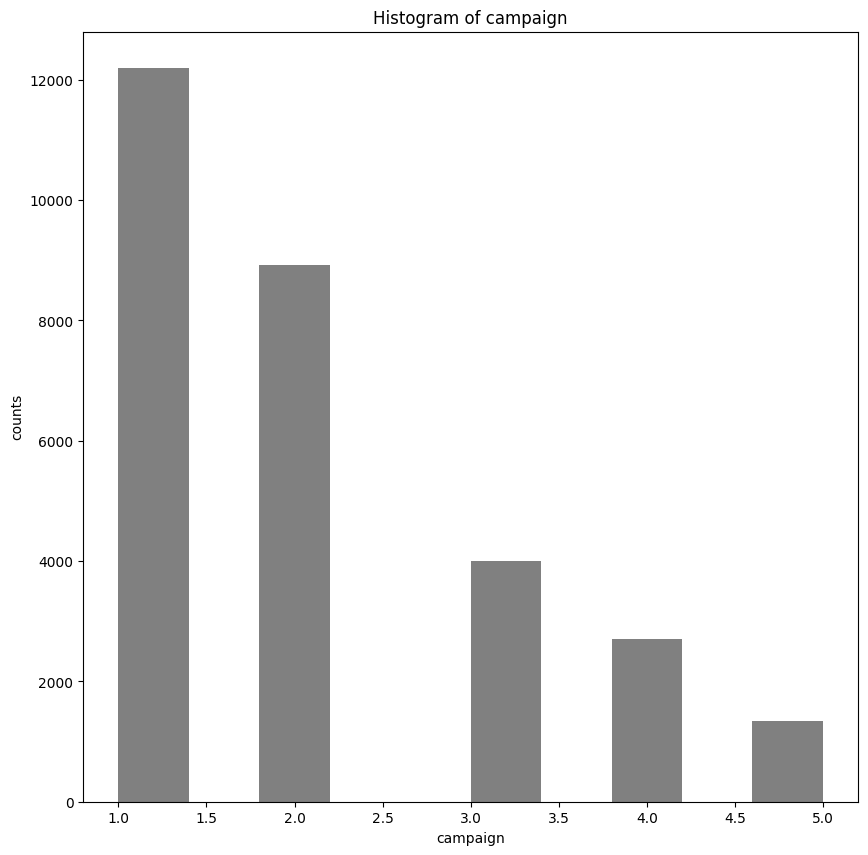

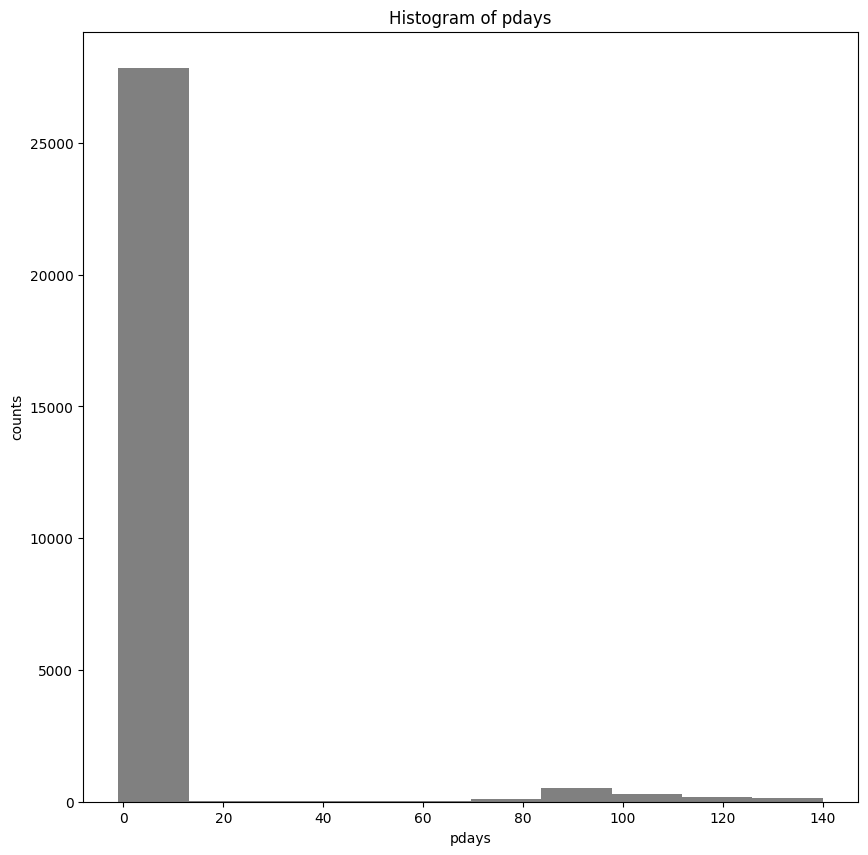

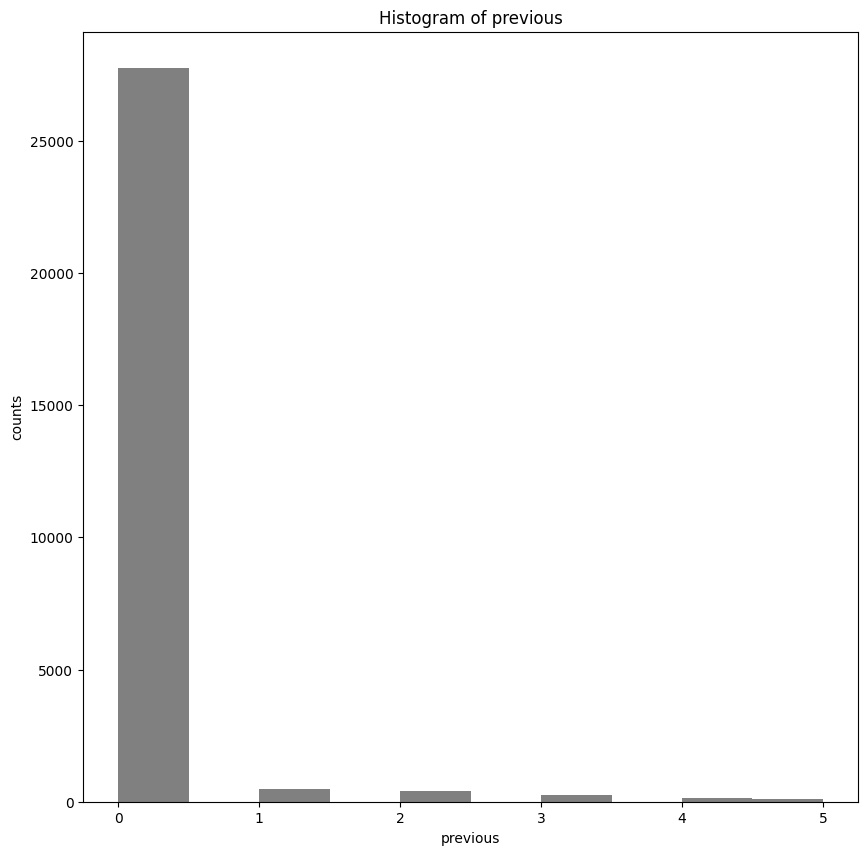

In [ ]:
columns_to_include = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
for column in dc:
  if column in columns_to_include:
    histogram(dc, column, 'Histogram of ' + column, column, 'counts')

### **Bivariate Analysis**

In [ ]:
# Function group barchart
def group_barchart(data, column):
  subscribe = data.groupby(['subscribe', column]).size().reset_index(name = 'counts')

  g = sns.catplot(
      data = subscribe, kind = "bar",
      x = 'subscribe', y = 'counts', hue = column,
      palette = "dark", height = 6
  )

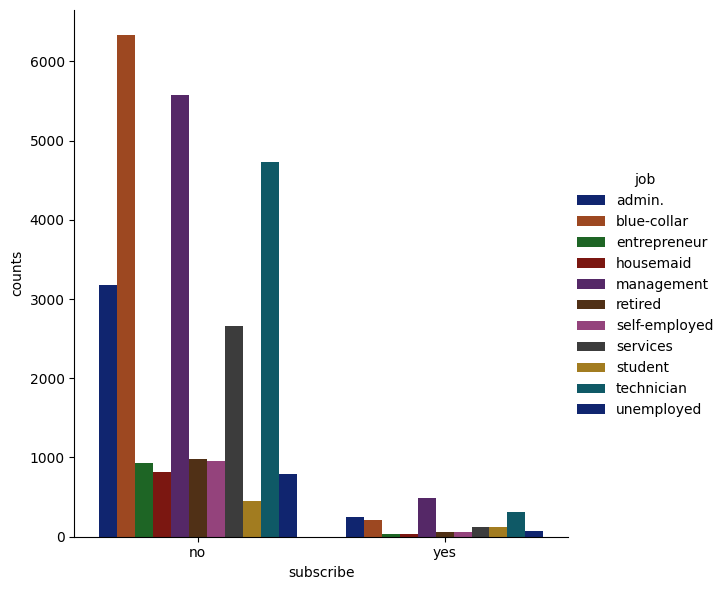

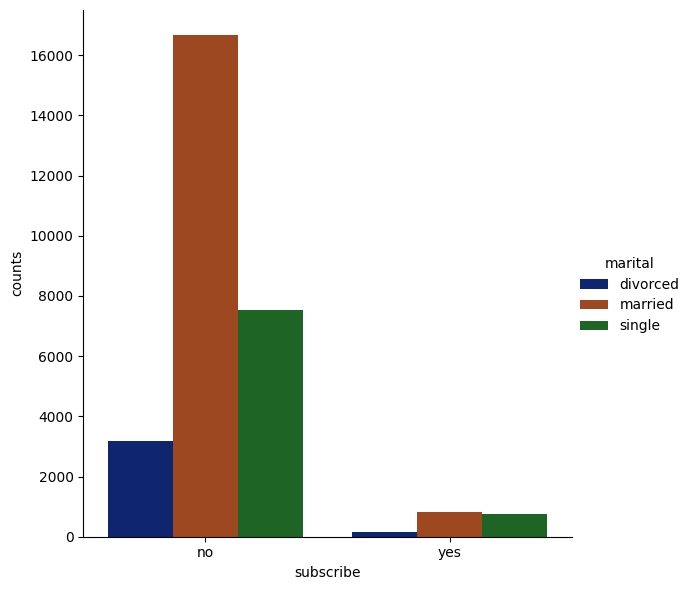

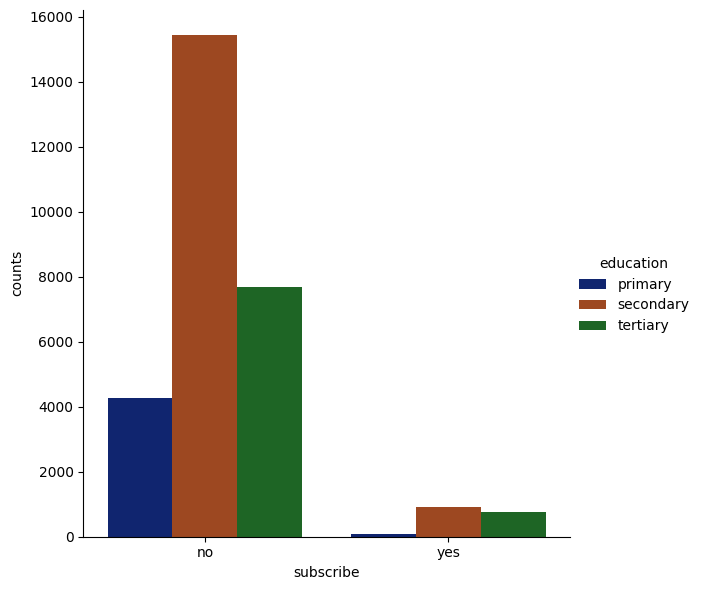

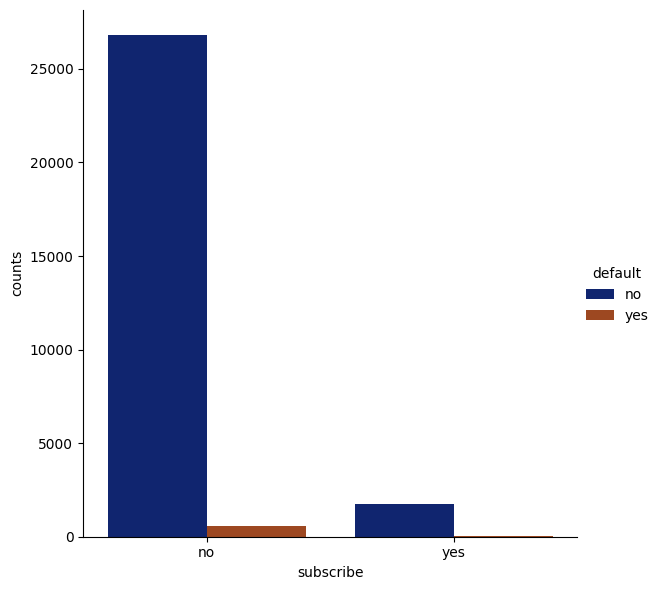

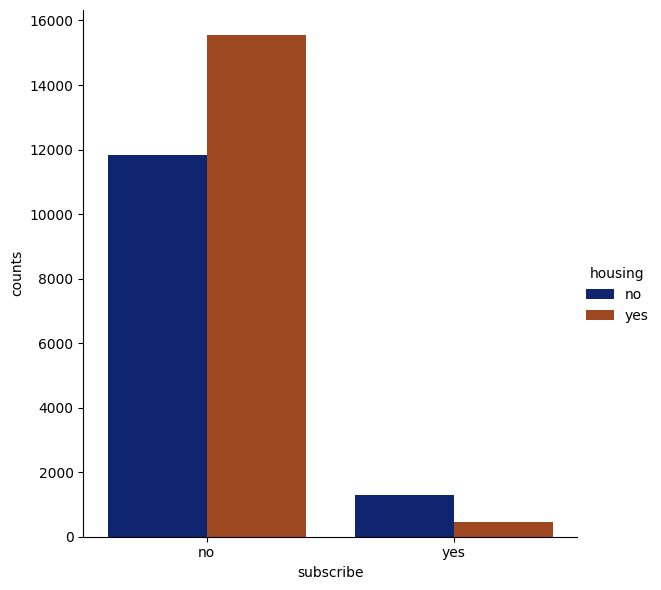

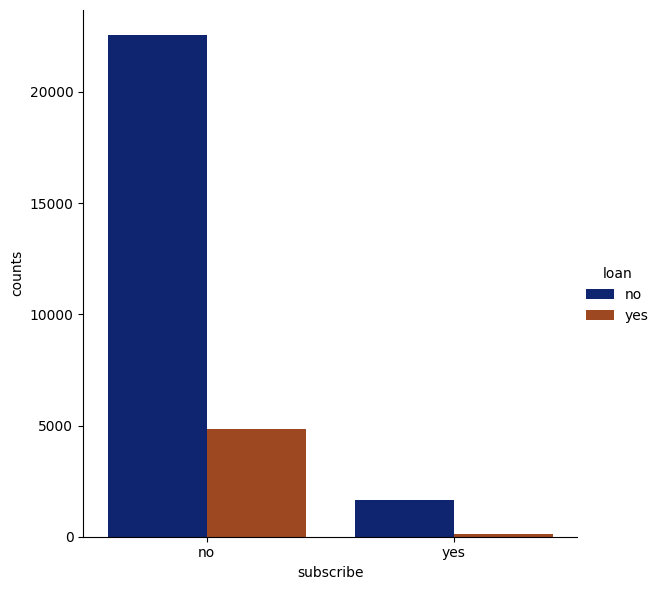

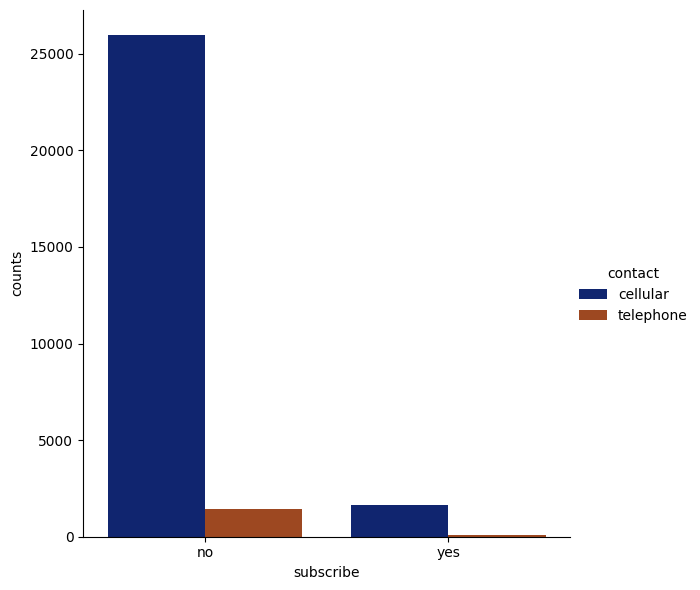

In [ ]:
columns_to_exclude = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'subscribe']
for column in dc:
  if column not in columns_to_exclude:
    group_barchart(dc, column)

In [ ]:
# Function for KDE plot
def kde_plot(data, column):
  facet = sns.FacetGrid(data, hue = 'subscribe', aspect = 4)
  facet.map(sns.kdeplot, column, fill = True)
  facet.add_legend()
  plt.show()

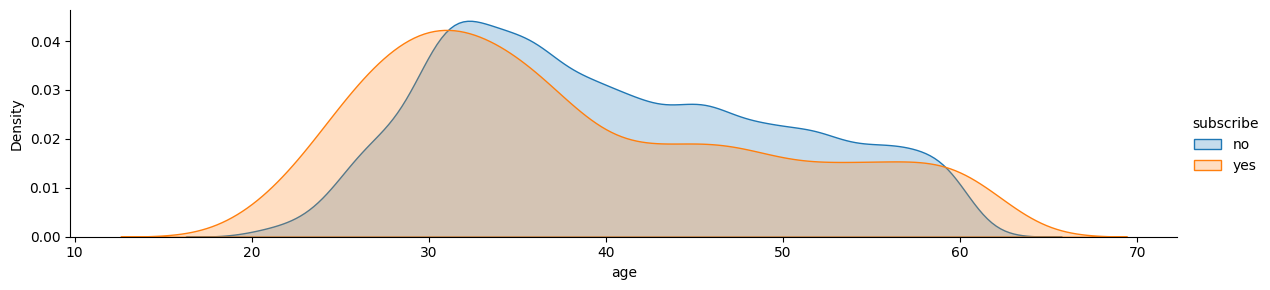

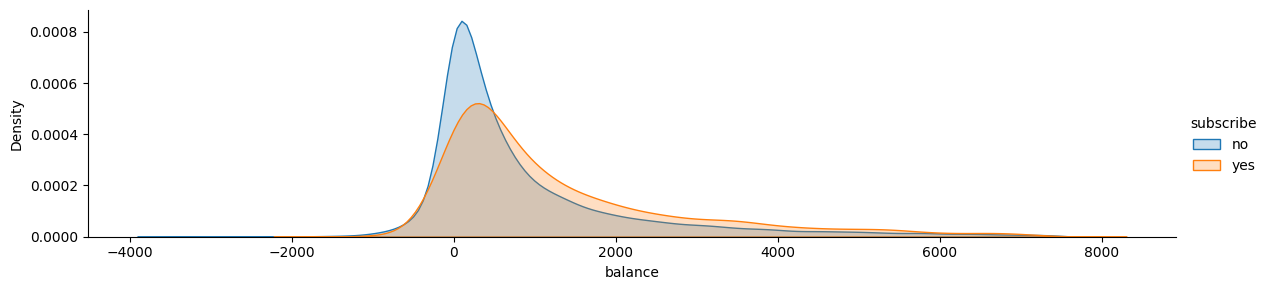

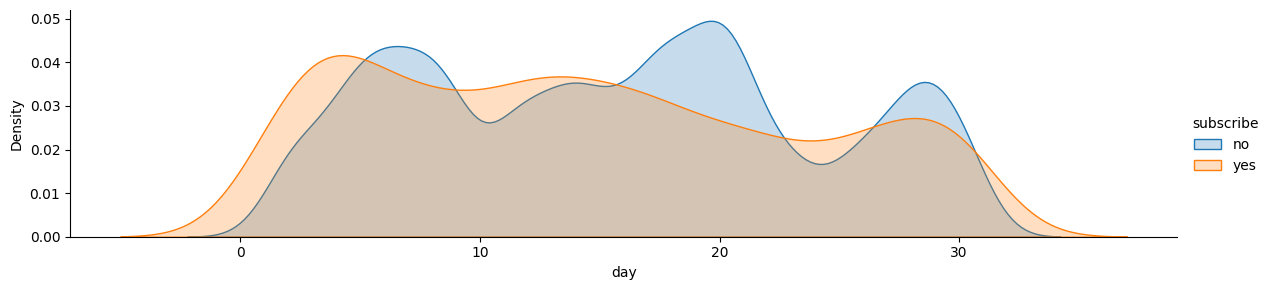

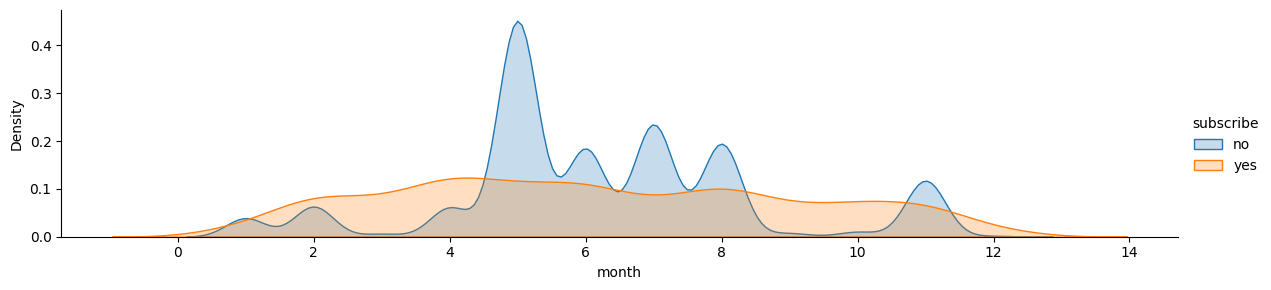

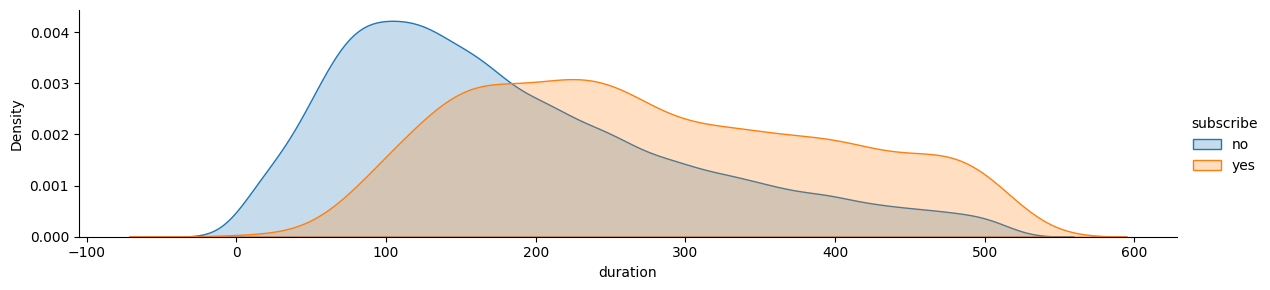

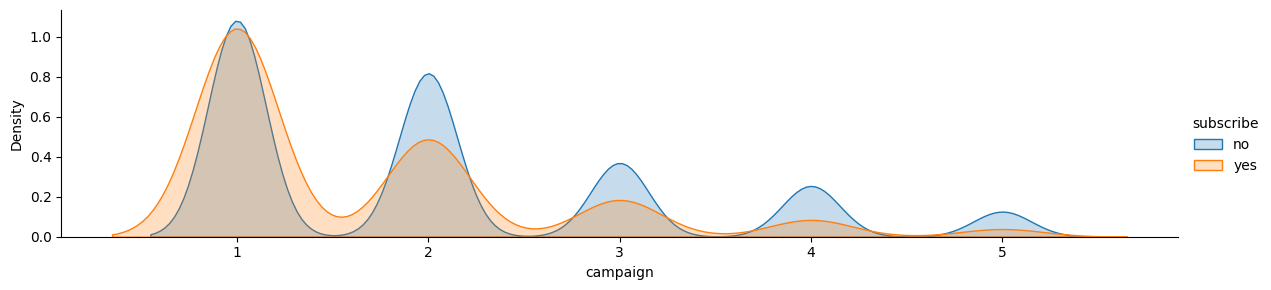

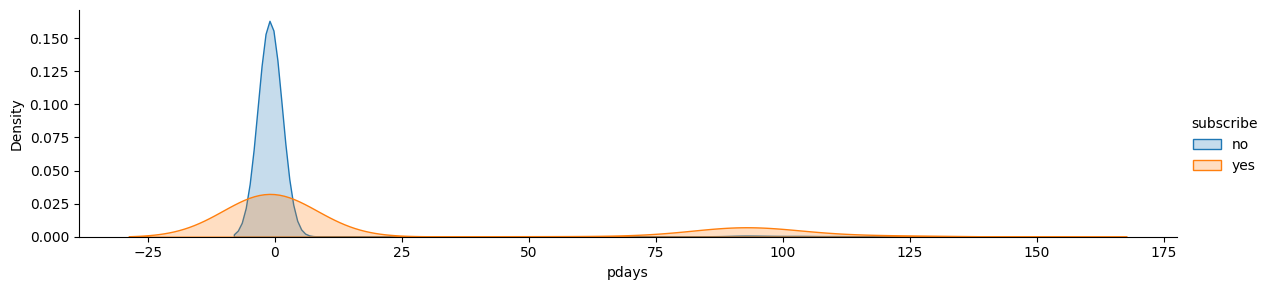

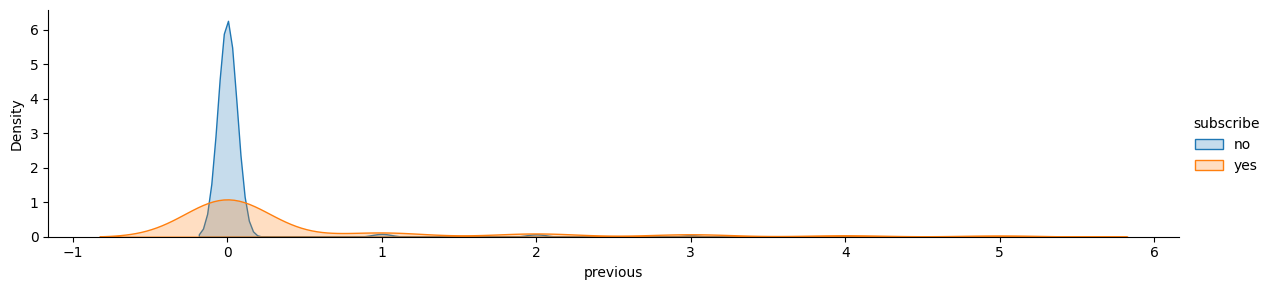

In [ ]:
columns_to_include = ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']
for column in dc:
  if column in columns_to_include:
    kde_plot(dc, column)

# **TGP 2**

## **Data Preparation**

### **Data Loading and Preprocessing**

Kita akan mereload dataset berdasarkan data paling terbaru dari hasil eksplorasi dan preproses di TGP sebelumnya.

In [ ]:
#Load Data
data = dc_encoded
data.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,0,1,0,0,0,1,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,1,0,1,0,1,0
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,0,1,0,0,1,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,1,0,0,1,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,0,0,1,0,1,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29158 entries, 0 to 29157
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  29158 non-null  int64
 1   default              29158 non-null  int8 
 2   balance              29158 non-null  int64
 3   housing              29158 non-null  int8 
 4   loan                 29158 non-null  int8 
 5   day                  29158 non-null  int64
 6   month                29158 non-null  int64
 7   duration             29158 non-null  int64
 8   campaign             29158 non-null  int64
 9   pdays                29158 non-null  int64
 10  previous             29158 non-null  int64
 11  subscribe            29158 non-null  int8 
 12  job_admin.           29158 non-null  int64
 13  job_blue-collar      29158 non-null  int64
 14  job_entrepreneur     29158 non-null  int64
 15  job_housemaid        29158 non-null  int64
 16  job_management       2

In [ ]:
data.isnull().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
subscribe              0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
contact_cellular       0
contact_telephone      0
dtype: int64

### **Feature Selection**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29158 entries, 0 to 29157
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  29158 non-null  int64
 1   default              29158 non-null  int8 
 2   balance              29158 non-null  int64
 3   housing              29158 non-null  int8 
 4   loan                 29158 non-null  int8 
 5   day                  29158 non-null  int64
 6   month                29158 non-null  int64
 7   duration             29158 non-null  int64
 8   campaign             29158 non-null  int64
 9   pdays                29158 non-null  int64
 10  previous             29158 non-null  int64
 11  subscribe            29158 non-null  int8 
 12  job_admin.           29158 non-null  int64
 13  job_blue-collar      29158 non-null  int64
 14  job_entrepreneur     29158 non-null  int64
 15  job_housemaid        29158 non-null  int64
 16  job_management       2

<Axes: >

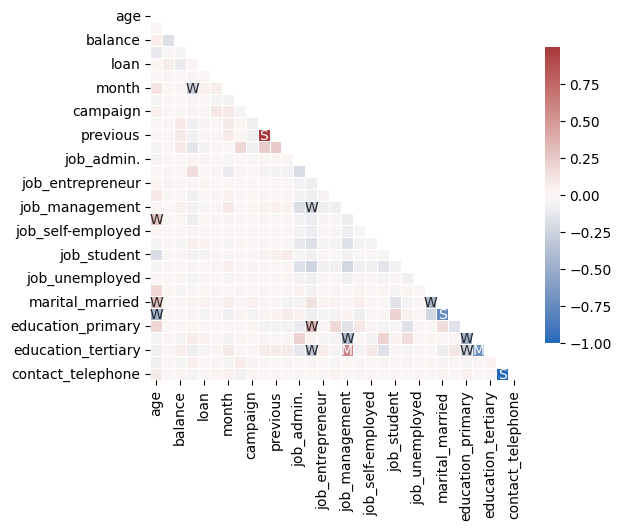

In [ ]:
# visualize Correlation plot
corr = data.corr('spearman')
sns.heatmap(corr,
            annot = np.where(np.abs(corr)>0.75,'S',
                      np.where(np.abs(corr)>0.5,'M',
                           np.where(np.abs(corr)>0.25,'W',''))),
            mask=np.triu(np.ones_like(corr, dtype=bool)),
            square=True,
            center=0,fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8}
            )

Dalam correlation plot di atas, dapat diperhatikan bahwa terdapat 3 hubungan variabel yang bersifat S (Strong), yakni "Previous dan Pdays", "marital_single dan marital_married", serta "contact_telephone dan contact_cellular"

Oleh karena itu, perlu dibuktikan bagaimana bentuk data kedua variabel tersebut ketika digambarkan dalam scatterplot.

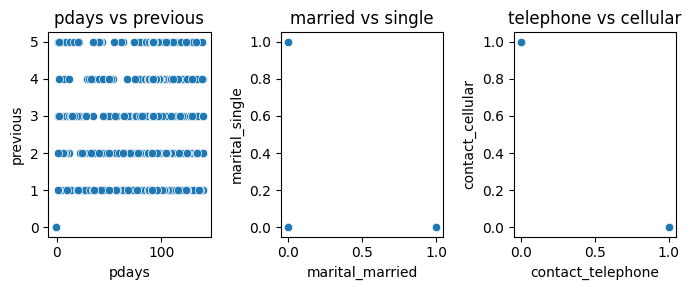

In [ ]:
# plot data of "alone"&"sibsp" and "southampton"&"cherbourg"
fig, ax = plt.subplots(1, 3, figsize=(7,3))

# pdays vs previous
sns.scatterplot(data, x='pdays', y='previous',ax=ax[0])
ax[0].set_title('pdays vs previous')

# married vs single
sns.scatterplot(data, x='marital_married', y='marital_single', ax=ax[1])
ax[1].set_title('married vs single')

# telephone vs cellular
sns.scatterplot(data, x='contact_telephone', y='contact_cellular', ax=ax[2])
ax[2].set_title('telephone vs cellular')

plt.tight_layout() # adjust spaces between subplots figure

Dalam konteks "Married vs Single" dan "Telephone vs Cellular", kebetulan jumlah data yang berasal dari parameter-parameter tersebut memiliki jumlah dan occurence yang serupa, maka memiliki correlation yang cukup tinggi.

In [ ]:
corr[['pdays', 'previous', 'marital_married', 'marital_single', 'contact_cellular', 'contact_telephone']]

,pdays,previous,marital_married,marital_single,contact_cellular,contact_telephone
age,-0.024189,-0.023932,0.308079,-0.459595,-0.092776,0.092776
default,-0.028243,-0.028322,-0.013628,0.003534,0.013443,-0.013443
balance,0.086153,0.085718,0.023847,0.008224,-0.040177,0.040177
housing,-0.079685,-0.079899,0.033517,-0.035555,0.057786,-0.057786
loan,-0.032849,-0.033190,0.042785,-0.058715,0.006376,-0.006376
day,-0.022085,-0.022747,0.003823,-0.007131,-0.031132,0.031132
month,0.085419,0.082747,0.073115,-0.081029,-0.051787,0.051787
duration,0.020990,0.021431,-0.027118,0.034333,0.071821,-0.071821
campaign,-0.085935,-0.085430,0.056902,-0.056310,-0.036961,0.036961
pdays,1.000000,0.999191,-0.028370,0.041151,-0.003959,0.003959


Bagaimana inference di atas mempengaruhi proses Feature Selection? Ketika kita menyadari bahwa terdapat data yang korelasinya besar (Dalam kata lain memiliki bentuk yang serupa dengan variabel lain), maka sebaiknya **variabel yang korelasinya terbesar terhadap variabel tujuan saja yang diambil untuk diproses model.**

In [ ]:
corr.sort_values('subscribe', ascending=False, key=abs)['subscribe']

subscribe              1.000000
previous               0.240415
pdays                  0.238314
duration               0.183405
housing               -0.147623
job_student            0.091700
balance                0.089912
marital_single         0.083254
education_tertiary     0.082427
campaign              -0.082131
loan                  -0.068960
education_primary     -0.068701
job_blue-collar       -0.065881
marital_married       -0.065386
age                   -0.059754
job_management         0.045017
day                   -0.038936
education_secondary   -0.025985
job_services          -0.023671
default               -0.023610
job_admin.             0.017938
job_entrepreneur      -0.017904
job_unemployed         0.017436
marital_divorced      -0.017335
job_housemaid         -0.015177
month                 -0.010806
contact_cellular      -0.006710
contact_telephone      0.006710
job_technician         0.001807
job_retired           -0.001430
job_self-employed      0.000241
Name: su

Dari data di atas, dapat disimpulkan sebagai berikut:
* Di antara variabel married dan single, variabel "single" memiliki korelasi terbesar terhadap variabel "subscribe." Maka dari itu, variabel married dapat di-ignore.
* Di antara variabel telephone dan cellular, kedua variabel memiliki korelasi yang sama besarnya terhadap variabel "subscribe." Nilai korelasi yang sama menunjukkan adanya multikolinearitas antara 2 variabel independen tersebut, sehingga salah satu variabel harus dihapus untuk menghindari koefisien regresi yang tidak stabil atau sensitif terhadap perubahan dalam data.

data = data.drop(['marital_married', 'contact_telephone'], axis=1)
data.head()

### **Data Balancing**

In [ ]:
data['subscribe'].value_counts()

subscribe
0    27391
1     1767
Name: count, dtype: int64

In [ ]:
X = data.drop('subscribe', axis=1)
Y = data['subscribe']

variabel X = digunakan sebagai "feature"

variabel Y = digunakan sebagai "label" bahan training

In [ ]:
balancer = RandomOverSampler(random_state=100)
X, Y = balancer.fit_resample(X, Y)
Y.value_counts()

subscribe
0    27391
1    27391
Name: count, dtype: int64

### **Data Splitting**

kita akan menggunakan 70% data sebagai Training Dataset, dan 30% sisanya sebagai Testing Dataset.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100, stratify=Y)

#### **Repeated Holdout**

Repeated holdout = metode data splitting yang membagi dataset berdasarkan **n_splits** dan mengambil sebanyak **test_size**.

2 tipe Repeated holdout = **ShuffleSplit** dan **StratifiedShuffleSplit** (StratifiedShuffleSplit berarti proses data splitting akan juga memperhatikan keseimbangan jumlah variabel tujuan agar dalam proses pelatihan, model machine learning tidak condong ke satu output tertentu)

In [ ]:
# initialize ShuffleSplit splitter
rep_holdout = ShuffleSplit(n_splits=10, test_size=0.3, random_state=100)

# initialize StratifiedShuffleSplit splitter
strat_rep_holdout = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=100)

In [ ]:
train_set_rephold = []
test_set_rephold = []

print('\nRepeated Holdout\n')
for i, (train_index, test_index) in enumerate(strat_rep_holdout.split(X, Y)): # for strat_repeated_holdout, incl. both X and y
# for i, (train_index, test_index) in enumerate(repeated_holdout.split(X)): # for repeated_holdout, incl. X only
  print(f"Fold {i}")
  print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
  print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")
  train_set_rephold.append(train_index)
  test_set_rephold.append(test_index)


Repeated Holdout

Fold 0
  Train: index=[35391 30640 29331 19291 18695]... (38347 rows)
  Test:  index=[22454 52527 31497 14890 13628]... (16435 rows)
Fold 1
  Train: index=[ 1795 50598 30108 13691 44561]... (38347 rows)
  Test:  index=[  704 51109 37053 28915 13263]... (16435 rows)
Fold 2
  Train: index=[11205  3946 11589  2155 23502]... (38347 rows)
  Test:  index=[43231 34086 48543 27961  8663]... (16435 rows)
Fold 3
  Train: index=[30795 36184 48663 10723 16975]... (38347 rows)
  Test:  index=[ 5930 12403 28590 30541 50599]... (16435 rows)
Fold 4
  Train: index=[ 3024 32151   911 42301 17704]... (38347 rows)
  Test:  index=[52774  5081  3217 42937  6612]... (16435 rows)
Fold 5
  Train: index=[ 5110 30528 39874 32309  1896]... (38347 rows)
  Test:  index=[13679  4677 20819 21581 29997]... (16435 rows)
Fold 6
  Train: index=[32649 24749 50232 20517 25858]... (38347 rows)
  Test:  index=[32963 47462 53084 43958 30512]... (16435 rows)
Fold 7
  Train: index=[38078 37995 40490 19936 204

In [ ]:
X.iloc[train_set_rephold[0]].describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
count,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,...,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000
mean,39.410097,0.015151,1087.513417,0.415548,0.121678,15.133987,6.179597,230.989543,1.873549,12.217618,...,0.173286,0.034944,0.104180,0.544032,0.351788,0.103737,0.538373,0.357890,0.945785,0.054215
std,10.419682,0.122155,1461.130003,0.492823,0.326918,8.681232,2.604786,126.288251,1.086345,33.457237,...,0.378499,0.183641,0.305498,0.498064,0.477534,0.304923,0.498532,0.479386,0.226445,0.226445
min,20.000000,0.000000,-3372.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,126.000000,0.000000,0.000000,7.000000,5.000000,131.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,521.000000,0.000000,0.000000,15.000000,6.000000,210.000000,2.000000,-1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,47.000000,0.000000,1506.000000,1.000000,0.000000,22.000000,8.000000,323.000000,2.000000,-1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,62.000000,1.000000,7451.000000,1.000000,1.000000,31.000000,12.000000,515.000000,5.000000,140.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Feature Scalling**

Feature scaling menyetarakan data numerikal yang ada dalam dataset **agar values nya tidak terlalu jauh.**

**2 macam feature scaling**:
1. Min-max scaling, dimana values akan dinormalkan berdasarkan value minimal dan maksimal sebuah atribut
2. Standard scaling, dimana values akan distandarkan berdasarkan standar deviasi = 1

In [ ]:
data

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,0,1,0,0,0,1,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,1,0,1,0,1,0
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,0,1,0,0,1,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,1,0,0,1,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29153,37,0,1428,0,0,16,11,333,2,-1,...,0,0,0,1,0,0,0,1,1,0
29154,34,0,557,0,0,17,11,224,1,-1,...,0,0,0,0,1,0,1,0,1,0
29155,23,0,113,0,0,17,11,266,1,-1,...,0,0,0,0,1,0,0,1,1,0
29156,25,0,505,0,1,17,11,386,2,-1,...,1,0,0,0,1,0,1,0,1,0


In [ ]:
X.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
count,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000,...,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000,54782.000000
mean,39.422182,0.014859,1090.683746,0.415611,0.122175,15.142510,6.170969,231.400387,1.878099,12.235004,...,0.173050,0.034373,0.104706,0.543481,0.351813,0.104870,0.537677,0.357453,0.945712,0.054288
std,10.414356,0.120989,1462.232463,0.492832,0.327491,8.665336,2.606511,126.052356,1.088799,33.471580,...,0.378294,0.182186,0.306177,0.498110,0.477540,0.306389,0.498583,0.479254,0.226587,0.226587
min,20.000000,0.000000,-3372.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,127.000000,0.000000,0.000000,7.000000,5.000000,131.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,521.000000,0.000000,0.000000,15.000000,6.000000,212.000000,2.000000,-1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,47.000000,0.000000,1508.000000,1.000000,0.000000,21.000000,8.000000,322.000000,2.000000,-1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,62.000000,1.000000,7451.000000,1.000000,1.000000,31.000000,12.000000,515.000000,5.000000,140.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaler = StandardScaler()

X_train['age'] = scaler.fit_transform(X_train[['age']]) # "fit" on the TRAIN set only, then transform
X_test['age'] = scaler.transform(X_test[['age']]) # while on the TEST set, just "transform" it

X_train['day'] = scaler.fit_transform(X_train[['day']])
X_test['day'] = scaler.transform(X_test[['day']])

X_train['month'] = scaler.fit_transform(X_train[['month']])
X_test['month'] = scaler.transform(X_test[['month']])

X_train['duration'] = scaler.fit_transform(X_train[['duration']])
X_test['duration'] = scaler.transform(X_test[['duration']])

X_train['campaign'] = scaler.fit_transform(X_train[['campaign']])
X_test['campaign'] = scaler.transform(X_test[['campaign']])

X_train['previous'] = scaler.fit_transform(X_train[['previous']])
X_test['previous'] = scaler.transform(X_test[['previous']])

X_train.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
count,3.834700e+04,38347.000000,38347.000000,38347.000000,38347.000000,3.834700e+04,3.834700e+04,3.834700e+04,3.834700e+04,38347.000000,...,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000,38347.000000
mean,1.348932e-16,0.015151,1087.513417,0.415548,0.121678,7.930537e-17,7.782302e-17,6.040549e-17,-4.409971e-17,12.217618,...,0.173286,0.034944,0.104180,0.544032,0.351788,0.103737,0.538373,0.357890,0.945785,0.054215
std,1.000013e+00,0.122155,1461.130003,0.492823,0.326918,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,33.457237,...,0.378499,0.183641,0.305498,0.498064,0.477534,0.304923,0.498532,0.479386,0.226445,0.226445
min,-1.862854e+00,0.000000,-3372.000000,0.000000,0.000000,-1.628130e+00,-1.988518e+00,-1.813253e+00,-8.041285e-01,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.071462e-01,0.000000,126.000000,0.000000,0.000000,-9.369746e-01,-4.528634e-01,-7.917668e-01,-8.041285e-01,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-2.313054e-01,0.000000,521.000000,0.000000,0.000000,-1.543430e-02,-6.894969e-02,-1.662056e-01,1.164015e-01,-1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,7.284293e-01,0.000000,1506.000000,1.000000,0.000000,7.909134e-01,6.988778e-01,7.285845e-01,1.164015e-01,-1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,2.168031e+00,1.000000,7451.000000,1.000000,1.000000,1.827646e+00,2.234533e+00,2.248936e+00,2.877992e+00,140.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature scaling digunakan untuk mencegah menurunnya akurasi, serta mencegah membludaknya computational cost. Di kata lain, perubahan yang ada pada tabel di atas hanya membantu dari perhitungan statistika dan tidak berpengaruh pada kenyataan dari data tersebut.

## **Classification Model**


### **1. Decision Tree**

#### **Library**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#### **Classification without Backward Selection**

In [ ]:
cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=cv_method, scoring='f1_macro')
grid_result = grid_search.fit(X_train, Y_train)

best_params = grid_result.best_params_
print("Parameter terbaik:", best_params)

KeyboardInterrupt: 

In [ ]:
dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)

f1_scores = []
auc_roc_scores = []

for i, (train_index, test_index) in enumerate(cv_method.split(X_train, Y_train)):
  X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
  Y_fold_train, Y_fold_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

  dt_classifier.fit(X_fold_train, Y_fold_train)

  Y_pred_test = dt_classifier.predict(X_fold_test)

  # F1 score dan AUC-ROC
  f1 = f1_score(Y_fold_test, Y_pred_test)
  auc_roc = roc_auc_score(Y_fold_test, Y_pred_test)
  print(f"Iterasi {int(i/10)+1}, Fold {i%10+1} - F1 Score: {f1} - AUC-ROC: {auc_roc}")
  f1_scores.append(f1)
  auc_roc_scores.append(auc_roc)

f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
print(f"Rata-rata F1 Score: {f1_mean}, Simpangan Baku F1 Score: {f1_std}")

auc_roc_mean = np.mean(auc_roc_scores)
auc_roc_std = np.std(auc_roc_scores)
print(f"Rata-rata AUC-ROC: {auc_roc_mean}, Simpangan Baku AUC-ROC: {auc_roc_std}")

best_iter = np.argmax(f1_scores) // 10 + 1
best_fold = np.argmax(f1_scores) % 10 + 1
print(f"Iterasi terbaik: {best_iter}, Fold terbaik: {best_fold}")


In [ ]:
dt_classifier.fit(X_train, Y_train)
Y_pred = dt_classifier.predict(X_test)
f1_test = f1_score(Y_test, Y_pred)
auc_roc_test = roc_auc_score(Y_test, Y_pred)

print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
print("F1-score pada data uji:", f1_test)
print("AUC-ROC pada data uji:", auc_roc_test)

#### **Backward Selection**

In [ ]:
# grouped_feature_names = [('age',), ('default',), ('balance',), ('housing',),
#                          ('loan',), ('day',), ('month',), ('duration',), ('campaign',),
#                          ('pdays',), ('previous',), ('job_admin.', 'job_blue-collar',
#                                                    'job_entrepreneur', 'job_housemaid',
#                                                    'job_management', 'job_retired', 'job_self-employed', 'job_services',
#                                                    'job_student', 'job_technician', 'job_unemployed'),
#                          ('marital_divorced', 'marital_married', 'marital_single'),
#                          ('education_primary', 'education_secondary', 'education_tertiary'),
#                          ('contact_cellular', 'contact_telephone')]

# grouped_feature_indices = []
# for group in grouped_feature_names:
#     indices = [X_train.columns.get_loc(col_name) for col_name in group]
#     grouped_feature_indices.extend(indices)

# # Latih SFS sebelum iterasi
# sfs = SFS(estimator=dt_classifier,
#               k_features=(10, len(grouped_feature_indices)),
#               forward=False,
#               scoring='f1_weighted',
#               cv=10)

# sfs = sfs.fit(X_train.to_numpy()[:, grouped_feature_indices], Y_train)

# print(f"Selected feature group indices for k=:{len(grouped_feature_indices)}", sfs.k_feature_idx_)

# X_train_sfs = X_train.to_numpy()[:, sfs.k_feature_idx_]
# X_test_sfs = X_test.to_numpy()[:, sfs.k_feature_idx_]

# dt_classifier.fit(X_train_sfs, Y_train)

# Y_pred = dt_classifier.predict(X_test_sfs)

# f1 = f1_score(Y_test, Y_pred)
# print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
# print(f"F1 score on testing data with selected feature groups for k=len(grouped_feature_indices):", f1)

# last_len = len(sfs.k_feature_idx_)

# # Iterasi Pelatihan untuk mendapatkan pertimbangan 10 fitur
# for k in range(last_len-1, 10, -1):
#     sfs = SFS(estimator=dt_classifier,
#               k_features=(10, k),
#               forward=False,
#               scoring='f1_weighted',
#               cv=10)

#     sfs = sfs.fit(X_train.to_numpy()[:, grouped_feature_indices], Y_train)

#     print(f"Selected feature group indices for k={k}:", sfs.k_feature_idx_)

#     X_train_sfs = X_train.to_numpy()[:, sfs.k_feature_idx_]
#     X_test_sfs = X_test.to_numpy()[:, sfs.k_feature_idx_]

#     dt_classifier.fit(X_train_sfs, Y_train)

#     Y_pred = dt_classifier.predict(X_test_sfs)

#     f1 = f1_score(Y_test, Y_pred)
#     print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
#     print(f"F1 score on testing data with selected feature groups for k={k}:", f1)


#### **Classification with Backward Selection**

In [ ]:
selected_feature_indices = [0, 2, 3, 4, 5, 6, 7, 8, 9, 22]

f1_scores = []
auc_roc_scores = []

# Melakukan validasi silang
for i, (train_index, test_index) in enumerate(cv_method.split(X_train, Y_train)):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_fold_train, Y_fold_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Memilih hanya fitur yang telah dipilih setelah proses backward selection
    X_fold_train_selected = X_fold_train.iloc[:, selected_feature_indices]
    X_fold_test_selected = X_fold_test.iloc[:, selected_feature_indices]

    # Melatih model Decision Tree pada setiap fold train
    dt_classifier.fit(X_fold_train_selected, Y_fold_train)

    # Melakukan prediksi pada setiap fold test
    Y_pred_test = dt_classifier.predict(X_fold_test_selected)

    # Menghitung skor F1 dan AUC-ROC pada setiap fold test
    f1 = f1_score(Y_fold_test, Y_pred_test)
    auc_roc = roc_auc_score(Y_fold_test, Y_pred_test)

    # Menampilkan skor F1 dan AUC-ROC untuk setiap fold
    print(f"Iterasi {int(i/10)+1}, Fold {i%10+1} - F1 Score: {f1} - AUC-ROC: {auc_roc}")

    # Menyimpan skor F1 dan AUC-ROC pada setiap fold
    f1_scores.append(f1)
    auc_roc_scores.append(auc_roc)

# Menghitung rata-rata dan simpangan baku dari skor F1 dan AUC-ROC
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
print(f"Rata-rata F1 Score: {f1_mean}, Simpangan Baku F1 Score: {f1_std}")

auc_roc_mean = np.mean(auc_roc_scores)
auc_roc_std = np.std(auc_roc_scores)
print(f"Rata-rata AUC-ROC: {auc_roc_mean}, Simpangan Baku AUC-ROC: {auc_roc_std}")

# Menentukan iterasi dan fold terbaik berdasarkan skor F1 terbaik
best_iter = np.argmax(f1_scores) // 10 + 1
best_fold = np.argmax(f1_scores) % 10 + 1
print(f"Iterasi terbaik: {best_iter}, Fold terbaik: {best_fold}")


In [ ]:
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

dt_classifier.fit(X_train_selected, Y_train)
Y_pred = dt_classifier.predict(X_test_selected)
f1_test = f1_score(Y_test, Y_pred)
auc_roc_test = roc_auc_score(Y_test, Y_pred)

print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
print("F1-score pada data uji:", f1_test)
print("AUC-ROC pada data uji:", auc_roc_test)

### **2. K-Nearest Neighbors**

#### **Klasifikasi Awal**

In [ ]:
data.info()

In [ ]:
# Test different values of k
best_k = 1
best_score = 0

for k in range(3, 6, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    score = accuracy_score(Y_test, predictions)

    print(f'k={k}, Accuracy={score}')

    if score > best_score:
        best_k = k
        best_score = score

print(f'The best value of k is {best_k} with an accuracy of {best_score}')

In [ ]:
# Fitting Data

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
auc = roc_auc_score(Y_test, Y_pred)
print('AUC-ROC: {}'.format(auc))

In [ ]:
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Perform 10-fold cross-validation repeated 3 times
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)

# Train model with all features
knn.fit(X_train, Y_train)

# Evaluate model with cross-validation and save scores for each fold
f1_scores = []
auc_scores = []
iteration = 1
fold = 1

for train_ix, test_ix in cv.split(X_train, Y_train):
    # split data
    X_train_fold, X_test_fold = X_train.iloc[train_ix], X_train.iloc[test_ix]
    Y_train_fold,Y_test_fold = Y_train.iloc[train_ix], Y_train.iloc[test_ix]

    # fit model
    knn.fit(X_train_fold, Y_train_fold)

    # evaluate model
    f1 = f1_score(Y_test_fold, knn.predict(X_test_fold))
    auc = roc_auc_score(Y_test_fold, knn.predict_proba(X_test_fold)[:, 1])

    f1_scores.append(f1)
    auc_scores.append(auc)

    if fold == 1:
        print('Iterasi {} :'.format(iteration))
    print('Fold {} - F1 Score: {:.4f}, AUC-ROC: {:.4f}'.format(fold, f1, auc))

    fold += 1
    if fold > 10:
        iteration += 1
        fold = 1

# Calculate average and standard deviation of scores
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
auc_mean = np.mean(auc_scores)
auc_std = np.std(auc_scores)

# Print results
print('F1 Score - Mean: {:.4f}, Standard Deviation: {:.4f}'.format(f1_mean, f1_std))
print('AUC-ROC - Mean: {:.4f}, Standard Deviation: {:.4f}'.format(auc_mean, auc_std))

# Determine the best iteration and fold based on F1 and AUC-ROC scores
best_iteration = (np.argmax([f + a - fs - as_ for f, a, fs, as_ in zip(f1_scores, auc_scores, [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) // 10) + 1
best_fold = (np.argmax([f + a - fs - as_ for f, a, fs, as_ in zip(f1_scores, auc_scores, [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) % 10) + 1

print('The best iteration based on F1 and AUC-ROC is:', best_iteration)
print('The best fold in that iteration is:', best_fold)

#### **Eksperimen dengan Backward Selection**

##### **1. Tanpa Memperhatikan Fitur yang telah diencoding**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [ ]:
# 1. Inisialisasi model kNN untuk setelah di backward namun tidak memerhatikan fitur yang telah diencoding
knn = KNeighborsClassifier(n_neighbors=3)

# Inisialisasi Sequential Feature Selector
sfs = SFS(knn,
           k_features=(10, 29),
           forward=False,
           floating=False,
           scoring='f1',
           cv=10)

# Lakukan fit pada data
sfs = sfs.fit(X_train, Y_train)

# Cetak fitur yang dipilih
print('Fitur yang dipilih:', sfs.k_feature_names_)

# Memilih fitur yang terpilih dari data latih dan data uji
X_train_selected = X_train.iloc[:, list(sfs.k_feature_idx_)]
X_test_selected = X_test.iloc[:, list(sfs.k_feature_idx_)]

# Melatih model dengan fitur yang terpilih
knn.fit(X_train_selected, Y_train)

# Mengevaluasi model
Y_pred = knn.predict(X_test_selected)
score = f1_score(Y_test, Y_pred)

print('F1 Score: {:.4f}'.format(score))

##### **2. Menggunakan 10 Fitur Terpilih tanpa 10-Cross Validation**

In [ ]:
all_features = X.columns.tolist()
print('Semua Fitur dalam Data:',all_features)

# Dapatkan fitur yang dipilih
selected_features = list(sfs.k_feature_names_)

# Dapatkan nama dasar dari fitur yang tidak dipilih
non_selected_bases = set(feature.split('_')[0] for feature in all_features if feature not in selected_features)

# Hapus fitur berdasarkan nama dasar yang tidak dipilih
final_selected_features = [feature for feature in selected_features if feature.split('_')[0] not in non_selected_bases]
print('10 Fitur yang dipilih:', final_selected_features)

# Memilih fitur yang terpilih dari data latih dan data uji
X_train_selected = X_train[final_selected_features]
X_test_selected = X_test[final_selected_features]

In [ ]:
# 2. Menggunakan 10 Fitur Terpilih tanpa 10-Cross Validation
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_selected, Y_train)
Y_pred = knn.predict(X_test_selected)
print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))

##### **3. Menggunakan 10 Fitur Terpilih dan 10-Cross Validation**

In [ ]:
from sklearn.metrics import classification_report

# Initialize KNN model menggunakan 10 Fitur Terpilih dengan 10-Cross Validation
knn = KNeighborsClassifier(n_neighbors=3)

# Perform 10-fold cross-validation repeated 3 times
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)

# Train model with features
knn.fit(X_train_selected, Y_train)

# Evaluate model with cross-validation and save scores for each fold
f1_scores = []
auc_scores = []
iteration = 1
fold = 1

# Inisialisasi variabel untuk menyimpan prediksi terbaik
best_preds = None
best_true = None
best_f1 = 0

for train_ix, test_ix in cv.split(X_train_selected, Y_train):
    # split data
    X_train_selected_fold, X_test_selected_fold = X_train_selected.iloc[train_ix], X_train_selected.iloc[test_ix]
    Y_train_fold,Y_test_fold = Y_train.iloc[train_ix], Y_train.iloc[test_ix]

    # fit model
    knn.fit(X_train_selected_fold, Y_train_fold)

    # predict labels
    preds = knn.predict(X_test_selected_fold)

    # evaluate model
    f1 = f1_score(Y_test_fold, preds)
    auc = roc_auc_score(Y_test_fold, knn.predict_proba(X_test_selected_fold)[:, 1])

    f1_scores.append(f1)
    auc_scores.append(auc)

    if fold == 1:
        print('Iterasi {} :'.format(iteration))
    print('Fold {} - F1 Score: {:.4f}, AUC-ROC: {:.4f}'.format(fold, f1, auc))

    # if this f1 is better than the previous best, save these predictions
    if f1 > best_f1:
        best_f1 = f1
        best_preds = preds
        best_true = Y_test_fold

    fold += 1
    if fold > 10:
        iteration += 1
        fold = 1

# Calculate average and standard deviation of scores
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
auc_mean = np.mean(auc_scores)
auc_std = np.std(auc_scores)

# Print results
print('10 Fitur yang dipilih:', final_selected_features)
print('F1 Score - Mean: {:.4f}, Standard Deviation: {:.4f}'.format(f1_mean, f1_std))
print('AUC-ROC - Mean: {:.4f}, Standard Deviation: {:.4f}'.format(auc_mean, auc_std))

# Mencetak iterasi dan lipatan terbaik berdasarkan F1 dan AUC-ROC
best_iteration = (np.argmax([f + a for f, a in zip(f1_scores, auc_scores)]) // 10) + 1
best_fold = (np.argmax([f + a for f, a in zip(f1_scores, auc_scores)]) % 10) + 1
print('Iterasi terbaik berdasarkan F1 dan AUC-ROC adalah:', best_iteration)
print('Lipatan terbaik dalam iterasi tersebut adalah:', best_fold)

# Mencetak iterasi dan lipatan terbaik berdasarkan F1
best_iteration_f1 = (np.argmax(f1_scores) // 10) + 1
best_fold_f1 = (np.argmax(f1_scores) % 10) + 1
print('Iterasi terbaik berdasarkan F1 adalah:', best_iteration_f1)
print('Lipatan terbaik dalam iterasi tersebut adalah:', best_fold_f1)

# Print classification report for best fold
print('Classification report for best fold:\n', classification_report(best_true, best_preds))

In [ ]:
from sklearn.metrics import accuracy_score

knn.fit(X_train_selected, Y_train)

# Mengevaluasi model sesudah
Y_pred = knn.predict(X_test_selected)

# Menghitung akurasi
accuracy = accuracy_score(Y_test, Y_pred)

print('Akurasi pada data uji:', accuracy)

In [ ]:
from sklearn.metrics import accuracy_score

knn.fit(X_train, Y_train)

# Mengevaluasi model sebelum
Y_pred = knn.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(Y_test, Y_pred)

print('Akurasi pada data uji:', accuracy)

### **3. Naives Bayes**

#### **Library**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#### **Classification without Backward Selection**

In [ ]:
naive_bayes = GaussianNB()

cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

f1_scores = []
auc_roc_scores = []

for i, (train_index, test_index) in enumerate(cv_method.split(X_train, Y_train)):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_fold_train, Y_fold_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

    naive_bayes.fit(X_fold_train, Y_fold_train)

    Y_pred_test = naive_bayes.predict(X_fold_test)

    # Hitung F1 score dan AUC-ROC
    f1 = f1_score(Y_fold_test, Y_pred_test)
    auc_roc = roc_auc_score(Y_fold_test, Y_pred_test)

    # Cetak skor F1 dan AUC-ROC untuk setiap fold
    print(f"Iterasi {int(i/10)+1}, Fold {i%10+1} - F1 Score: {f1} - AUC-ROC: {auc_roc}")

    # Tambahkan skor ke dalam list
    f1_scores.append(f1)
    auc_roc_scores.append(auc_roc)

f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
print(f"Rata-rata F1 Score: {f1_mean}, Simpangan Baku F1 Score: {f1_std}")

auc_roc_mean = np.mean(auc_roc_scores)
auc_roc_std = np.std(auc_roc_scores)
print(f"Rata-rata AUC-ROC: {auc_roc_mean}, Simpangan Baku AUC-ROC: {auc_roc_std}")

best_iter = np.argmax(f1_scores) // 10 + 1
best_fold = np.argmax(f1_scores) % 10 + 1
print(f"Iterasi terbaik: {best_iter}, Fold terbaik: {best_fold}")

In [ ]:
naive_bayes.fit(X_train, Y_train)
Y_pred = naive_bayes.predict(X_test)
f1_test = f1_score(Y_test, Y_pred)
auc_roc_test = roc_auc_score(Y_test, Y_pred)

print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
print("F1-score pada data uji:", f1_test)
print("AUC-ROC pada data uji:", auc_roc_test)

#### **Backward Selection**

In [ ]:
# grouped_feature_names = [('age',), ('default',), ('balance',), ('housing',),
#                          ('loan',), ('day',), ('month',), ('duration',), ('campaign',),
#                          ('pdays',), ('previous',), ('job_admin.', 'job_blue-collar',
#                                                    'job_entrepreneur', 'job_housemaid',
#                                                    'job_management', 'job_retired', 'job_self-employed', 'job_services',
#                                                    'job_student', 'job_technician', 'job_unemployed'),
#                          ('marital_divorced', 'marital_married', 'marital_single'),
#                          ('education_primary', 'education_secondary', 'education_tertiary'),
#                          ('contact_cellular', 'contact_telephone')]

# grouped_feature_indices = []
# for group in grouped_feature_names:
#     indices = [X_train.columns.get_loc(col_name) for col_name in group]
#     grouped_feature_indices.extend(indices)

# # Fit SFS sebelum iterasi
# sfs = SFS(estimator=naive_bayes,
#               k_features=(10, len(grouped_feature_indices)),
#               forward=False,
#               scoring='f1_weighted',
#               cv=10)

# sfs = sfs.fit(X_train.to_numpy()[:, grouped_feature_indices], Y_train)

# print(f"Selected feature group indices for k=:{len(grouped_feature_indices)}", sfs.k_feature_idx_)

# X_train_sfs = X_train.to_numpy()[:, sfs.k_feature_idx_]
# X_test_sfs = X_test.to_numpy()[:, sfs.k_feature_idx_]

# naive_bayes.fit(X_train_sfs, Y_train)

# Y_pred = naive_bayes.predict(X_test_sfs)

# f1 = f1_score(Y_test, Y_pred)
# print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
# print(f"F1 score on testing data with selected feature groups for k=len(grouped_feature_indices):", f1)

# last_len = len(sfs.k_feature_idx_)

# # Iterasi Fit untuk mendapatkan pertimbangan 10 fitur
# for k in range(last_len-1, 10, -1):
#     sfs = SFS(estimator=naive_bayes,
#               k_features=(10, k),
#               forward=False,
#               scoring='f1_weighted',
#               cv=10)

#     sfs = sfs.fit(X_train.to_numpy()[:, grouped_feature_indices], Y_train)

#     print(f"Selected feature group indices for k={k}:", sfs.k_feature_idx_)

#     X_train_sfs = X_train.to_numpy()[:, sfs.k_feature_idx_]
#     X_test_sfs = X_test.to_numpy()[:, sfs.k_feature_idx_]

#     naive_bayes.fit(X_train_sfs, Y_train)

#     Y_pred = naive_bayes.predict(X_test_sfs)

#     f1 = f1_score(Y_test, Y_pred)
#     print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
#     print(f"F1 score on testing data with selected feature groups for k={k}:", f1)

#### **Classification with Backward Selection**

In [ ]:
selected_feature_indices = [0, 1, 3, 4, 6, 7, 9, 10, 13, 14, 25]

f1_scores = []
auc_roc_scores = []

# Melakukan validasi silang
for i, (train_index, test_index) in enumerate(cv_method.split(X_train, Y_train)):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_fold_train, Y_fold_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Memilih hanya fitur yang telah dipilih setelah proses backward selection
    X_fold_train_selected = X_fold_train.iloc[:, selected_feature_indices]
    X_fold_test_selected = X_fold_test.iloc[:, selected_feature_indices]

    # Melatih model Naive Bayes pada setiap fold train
    naive_bayes.fit(X_fold_train_selected, Y_fold_train)

    # Melakukan prediksi pada setiap fold test
    Y_pred_test = naive_bayes.predict(X_fold_test_selected)

    # Menghitung skor F1 dan AUC-ROC pada setiap fold test
    f1 = f1_score(Y_fold_test, Y_pred_test)
    auc_roc = roc_auc_score(Y_fold_test, Y_pred_test)

    # Menampilkan skor F1 dan AUC-ROC untuk setiap fold
    print(f"Iterasi {int(i/10)+1}, Fold {i%10+1} - F1 Score: {f1} - AUC-ROC: {auc_roc}")

    # Menyimpan skor F1 dan AUC-ROC pada setiap fold
    f1_scores.append(f1)
    auc_roc_scores.append(auc_roc)

# Menghitung rata-rata dan simpangan baku dari skor F1 dan AUC-ROC
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
print(f"Rata-rata F1 Score: {f1_mean}, Simpangan Baku F1 Score: {f1_std}")

auc_roc_mean = np.mean(auc_roc_scores)
auc_roc_std = np.std(auc_roc_scores)
print(f"Rata-rata AUC-ROC: {auc_roc_mean}, Simpangan Baku AUC-ROC: {auc_roc_std}")

# Menentukan iterasi dan fold terbaik berdasarkan skor F1 terbaik
best_iter = np.argmax(f1_scores) // 10 + 1
best_fold = np.argmax(f1_scores) % 10 + 1
print(f"Iterasi terbaik: {best_iter}, Fold terbaik: {best_fold}")


In [ ]:
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

naive_bayes.fit(X_train_selected, Y_train)
Y_pred = naive_bayes.predict(X_test_selected)
f1_test = f1_score(Y_test, Y_pred)
auc_roc_test = roc_auc_score(Y_test, Y_pred)

print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
print("F1-score pada data uji:", f1_test)
print("AUC-ROC pada data uji:", auc_roc_test)

### **4. Support Vector Machine (SVM)**

#### **Klasifikasi Awal**

In [ ]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
auc = roc_auc_score(Y_test, Y_pred)
print('AUC-ROC: {}'.format(auc))

In [ ]:
# Initialize SVM model
svm = SVC(kernel='linear', probability=True)

# Perform 10-fold cross-validation repeated 3 times
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)

# Train model with all features
svm.fit(X_train, Y_train)

# Evaluate model with cross-validation and save scores for each fold
f1_scores = []
auc_scores = []
iteration = 1
fold = 1

for train_ix, test_ix in cv.split(X_train, Y_train):
    # split data
    X_train_fold, X_test_fold = X_train.iloc[train_ix], X_train.iloc[test_ix]
    Y_train_fold,Y_test_fold = Y_train.iloc[train_ix], Y_train.iloc[test_ix]

    # fit model
    svm.fit(X_train_fold, Y_train_fold)

    # evaluate model
    f1 = f1_score(Y_test_fold, svm.predict(X_test_fold))
    auc = roc_auc_score(Y_test_fold, svm.predict_proba(X_test_fold)[:, 1])

    f1_scores.append(f1)
    auc_scores.append(auc)

    if fold == 1:
        print('Iterasi {} :'.format(iteration))
    print('Fold {} - F1 Score: {:.4f}, AUC-ROC: {:.4f}'.format(fold, f1, auc))

    fold += 1
    if fold > 10:
        iteration += 1
        fold = 1

# Calculate average and standard deviation of scores
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
auc_mean = np.mean(auc_scores)
auc_std = np.std(auc_scores)

# Print results
print('F1 Score - Mean: {:.4f}, Standard Deviation: {:.4f}'.format(f1_mean, f1_std))
print('AUC-ROC - Mean: {:.4f}, Standard Deviation: {:.4f}'.format(auc_mean, auc_std))

# Determine the best iteration and fold based on F1 and AUC-ROC scores
best_iteration = (np.argmax([f + a - fs - as_ for f, a, fs, as_ in zip(f1_scores, auc_scores, [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) // 10) + 1
best_fold = (np.argmax([f + a - fs - as_ for f, a, fs, as_ in zip(f1_scores, auc_scores, [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) % 10) + 1

print('The best iteration based on F1 and AUC-ROC is:', best_iteration)
print('The best fold in that iteration is:', best_fold)

#### **Eksperimen dengan Backward Selection**

##### **1. Tanpa Memperhatikan Fitur yang telah diencoding**

In [ ]:
# 1. Inisialisasi model SVM untuk setelah di backward namun tidak memerhatikan fitur yang telah diencoding
svm = SVC(kernel='linear', probability=True)

# Inisialisasi Sequential Feature Selector
sfs = SFS(svm,
           k_features=(10, 29),
           forward=False,
           floating=False,
           scoring='f1',
           cv=10)

# Lakukan fit pada data
sfs = sfs.fit(X_train, Y_train)

# Cetak fitur yang dipilih
print('Fitur yang dipilih:', sfs.k_feature_names_)

# Memilih fitur yang terpilih dari data latih dan data uji
X_train_selected = X_train.iloc[:, list(sfs.k_feature_idx_)]
X_test_selected = X_test.iloc[:, list(sfs.k_feature_idx_)]

# Melatih model dengan fitur yang terpilih
svm.fit(X_train_selected, Y_train)

# Mengevaluasi model
Y_pred = svm.predict(X_test_selected)
score = f1_score(Y_test, Y_pred)

print('F1 Score: {:.4f}'.format(score))

##### **2. Menggunakan 10 Fitur Terpilih tanpa 10-Cross Validation**

In [ ]:
all_features = X.columns.tolist()
print('Semua Fitur dalam Data:',all_features)

# Dapatkan fitur yang dipilih
selected_features = list(sfs.k_feature_names_)

# Dapatkan nama dasar dari fitur yang tidak dipilih
non_selected_bases = set(feature.split('_')[0] for feature in all_features if feature not in selected_features)

# Hapus fitur berdasarkan nama dasar yang tidak dipilih
final_selected_features = [feature for feature in selected_features if feature.split('_')[0] not in non_selected_bases]
print('10 Fitur yang dipilih:', final_selected_features)

# Memilih fitur yang terpilih dari data latih dan data uji
X_train_selected = X_train[final_selected_features]
X_test_selected = X_test[final_selected_features]

In [ ]:
# 2. Menggunakan 10 Fitur Terpilih tanpa 10-Cross Validation
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_selected, Y_train)
Y_pred = svm.predict(X_test_selected)
print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))

##### **3. Menggunakan 10 Fitur Terpilih dan 10-Cross Validation**

In [ ]:
from sklearn.metrics import classification_report

# Initialize SVM model menggunakan 10 Fitur Terpilih dengan 10-Cross Validation
svm = SVC(kernel='linear', probability=True)

# Perform 10-fold cross-validation repeated 3 times
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)

# Train model with features
svm.fit(X_train_selected, Y_train)

# Evaluate model with cross-validation and save scores for each fold
f1_scores = []
auc_scores = []
iteration = 1
fold = 1

# Inisialisasi variabel untuk menyimpan prediksi terbaik
best_preds = None
best_true = None
best_f1 = 0

for train_ix, test_ix in cv.split(X_train_selected, Y_train):
    # split data
    X_train_selected_fold, X_test_selected_fold = X_train_selected.iloc[train_ix], X_train_selected.iloc[test_ix]
    Y_train_fold,Y_test_fold = Y_train.iloc[train_ix], Y_train.iloc[test_ix]

    # fit model
    svm.fit(X_train_selected_fold, Y_train_fold)

    # predict labels
    preds = svm.predict(X_test_selected_fold)

    # evaluate model
    f1 = f1_score(Y_test_fold, preds)
    auc = roc_auc_score(Y_test_fold, svm.predict_proba(X_test_selected_fold)[:, 1])

    f1_scores.append(f1)
    auc_scores.append(auc)

    if fold == 1:
        print('Iterasi {} :'.format(iteration))
    print('Fold {} - F1 Score: {:.4f}, AUC-ROC: {:.4f}'.format(fold, f1, auc))

    # if this f1 is better than the previous best, save these predictions
    if f1 > best_f1:
        best_f1 = f1
        best_preds = preds
        best_true = Y_test_fold

    fold += 1
    if fold > 10:
        iteration += 1
        fold = 1

# Calculate average and standard deviation of scores
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
auc_mean = np.mean(auc_scores)
auc_std = np.std(auc_scores)

# Print results
print('10 Fitur yang dipilih:', final_selected_features)
print('F1 Score - Mean: {:.4f}, Standard Deviation: {:.4f}'.format(f1_mean, f1_std))
print('AUC-ROC - Mean: {:.4f}, Standard Deviation: {:.4f}'.format(auc_mean, auc_std))

# Mencetak iterasi dan lipatan terbaik berdasarkan F1 dan AUC-ROC
best_iteration = (np.argmax([f + a for f, a in zip(f1_scores, auc_scores)]) // 10) + 1
best_fold = (np.argmax([f + a for f, a in zip(f1_scores, auc_scores)]) % 10) + 1
print('Iterasi terbaik berdasarkan F1 dan AUC-ROC adalah:', best_iteration)
print('Lipatan terbaik dalam iterasi tersebut adalah:\n', best_fold)

# Mencetak iterasi dan lipatan terbaik berdasarkan F1
best_iteration_f1 = (np.argmax(f1_scores) // 10) + 1
best_fold_f1 = (np.argmax(f1_scores) % 10) + 1
print('Iterasi terbaik berdasarkan F1 adalah:', best_iteration_f1)
print('Lipatan terbaik dalam iterasi tersebut adalah:\n', best_fold_f1)

# Print classification report for best fold
print('Classification report for best fold:\n', classification_report(best_true, best_preds))

### **5. Backward Propagation Neural Networks (BPNN)**

#### **Library**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

#### **Classification without Backward Selection**

In [ ]:
# Initialize BPNN model
bpnn = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=1000)

# Perform 10-fold cross-validation repeated 3 times
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Train model
bpnn.fit(X_train, Y_train)

# Evaluate model
f1_scores = []
auc_scores = []
iteration = 1
fold = 1

for train_ix, test_ix in cv.split(X_train, Y_train):
    # Split data
    X_train_fold, X_test_fold = X_train.iloc[train_ix], X_train.iloc[test_ix]
    Y_train_fold,Y_test_fold = Y_train.iloc[train_ix], Y_train.iloc[test_ix]

    # Fit model
    bpnn.fit(X_train_fold, Y_train_fold)

    # Evaluate model
    f1 = f1_score(Y_test_fold, bpnn.predict(X_test_fold))
    auc = roc_auc_score(Y_test_fold, bpnn.predict_proba(X_test_fold)[:, 1])

    # Keep the value to the array
    f1_scores.append(f1)
    auc_scores.append(auc)

    print('Iteration: {} - Fold: {} | F1 Score: {:.2f}, AUC-ROC: {:.2f}'.format(iteration, fold, f1, auc))

    # Start next iteration
    fold += 1
    if fold > 10:
        iteration += 1
        fold = 1

# Calculate average and standard deviation of scores
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
auc_mean = np.mean(auc_scores)
auc_std = np.std(auc_scores)

# Print results each fold
print('\nF1 Score - Mean: {:.2f}, Standard Deviation: {:.2f}'.format(f1_mean, f1_std))
print('AUC-ROC - Mean: {:.2f}, Standard Deviation: {:.2f}'.format(auc_mean, auc_std))

# Determine the best iteration and fold
best_iteration = (np.argmax([f + a - f_std - a_std for f, a, f_std, a_std in zip(f1_scores, auc_scores,
                 [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) // 10) + 1
best_fold = (np.argmax([f + a - f_std - a_std for f, a, f_std, a_std in zip(f1_scores, auc_scores,
            [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) % 10) + 1

print('\nThe best model is iteration: {} - Fold: {}'.format(best_iteration, best_fold))
print("Jumlah fitur yang digunakan:", X_train.shape[1])

#### **Backward Selection**

RFE (Recursive Feature Elimination) adalah salah satu metode untuk melakukan seleksi fitur dengan cara secara iteratif menghapus fitur yang paling tidak penting dan melatih model dengan fitur yang tersisa. MLPClassifier tidak memiliki atribut `coef_` atau `feature_importances_`, yang diperlukan oleh RFE untuk menentukan pentingnya setiap fitur. Jadi, digunakan model lain yang mendukung pengekstrakan pentingnya fitur, contohnya RandomForestClassifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [ ]:
# Initialize the model and the selector
model = RandomForestClassifier()
selector = RFE(model, n_features_to_select=10, step=1)

# Fit the model
selector = selector.fit(X_train, Y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]
print("Fitur yang dipilih:", selected_features)

# Train the model with the selected features
X_train_selected = X_train[selected_features]
model.fit(X_train_selected, Y_train)

# Calculate the F1 score
score = f1_score(Y_test, model.predict(X_test[selected_features]))
print("F1 Score:", score)

#### **Classification with Backward Features**

In [ ]:
# Initialize RF model
bpnn = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=1000)

# Perform 10-fold cross-validation repeated 3 times
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Train model
bpnn.fit(X_train_selected, Y_train)

# Evaluate model
f1_scores = []
auc_scores = []
iteration = 1
fold = 1

for train_ix, test_ix in cv.split(X_train, Y_train):
    # Split data
    X_train_selected_fold, X_test_selected_fold = X_train_selected.iloc[train_ix], X_train_selected.iloc[test_ix]
    Y_train_fold,Y_test_fold = Y_train.iloc[train_ix], Y_train.iloc[test_ix]

    # Fit model
    bpnn.fit(X_train_selected_fold, Y_train_fold)

    # Evaluate model
    f1 = f1_score(Y_test_fold, bpnn.predict(X_test_selected_fold))
    auc = roc_auc_score(Y_test_fold, bpnn.predict_proba(X_test_selected_fold)[:, 1])

    # Keep the value to the array
    f1_scores.append(f1)
    auc_scores.append(auc)

    print('Iteration: {} - Fold: {} | F1 Score: {}, AUC-ROC: {}'.format(iteration, fold, f1, auc))

    # Start next iteration
    fold += 1
    if fold > 10:
        iteration += 1
        fold = 1

# Calculate average and standard deviation of scores
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
auc_mean = np.mean(auc_scores)
auc_std = np.std(auc_scores)

# Print results each fold
print('\nF1 Score - Mean: {}, Standard Deviation: {}'.format(f1_mean, f1_std))
print('AUC-ROC - Mean: {}, Standard Deviation: {}'.format(auc_mean, auc_std))

# Determine the best iteration and fold
best_iteration = (np.argmax([f + a - f_std - a_std for f, a, f_std, a_std in zip(f1_scores, auc_scores,
                 [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) // 10) + 1
best_fold = (np.argmax([f + a - f_std - a_std for f, a, f_std, a_std in zip(f1_scores, auc_scores,
            [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) % 10) + 1

print('\nThe best model is iteration: {} - Fold: {}'.format(best_iteration, best_fold))
print("Jumlah fitur yang digunakan:", X_train_selected.shape[1])

### **6. Logistic Regression**

#### **Library**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

#### **Classification without Backward Selection**

In [ ]:
# Initialize LR model
lr = LogisticRegression(max_iter=100000)

# Perform 10-fold cross-validation repeated 3 times
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Train model
lr.fit(X_train, Y_train)

# Evaluate model
f1_scores = []
auc_scores = []
iteration = 1
fold = 1

for train_ix, test_ix in cv.split(X_train, Y_train):
    # Split data
    X_train_fold, X_test_fold = X_train.iloc[train_ix], X_train.iloc[test_ix]
    Y_train_fold,Y_test_fold = Y_train.iloc[train_ix], Y_train.iloc[test_ix]

    # Fit model
    lr.fit(X_train_fold, Y_train_fold)

    # Evaluate model
    f1 = f1_score(Y_test_fold, lr.predict(X_test_fold))
    auc = roc_auc_score(Y_test_fold, lr.predict_proba(X_test_fold)[:, 1])

    # Keep the value to the array
    f1_scores.append(f1)
    auc_scores.append(auc)

    print('Iteration: {} - Fold: {} | F1 Score: {}, AUC-ROC: {}'.format(iteration, fold, f1, auc))

    # Start next iteration
    fold += 1
    if fold > 10:
        iteration += 1
        fold = 1

# Calculate average and standard deviation
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
auc_mean = np.mean(auc_scores)
auc_std = np.std(auc_scores)

# Print results each fold
print('\nF1 Score - Mean: {}, Standard Deviation: {}'.format(f1_mean, f1_std))
print('AUC-ROC - Mean: {}, Standard Deviation: {}'.format(auc_mean, auc_std))

# Determine the best iteration and fold
best_iteration = (np.argmax([f + a - f_std - a_std for f, a, f_std, a_std in zip(f1_scores, auc_scores,
                 [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) // 10) + 1
best_fold = (np.argmax([f + a - f_std - a_std for f, a, f_std, a_std in zip(f1_scores, auc_scores,
            [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) % 10) + 1

print('\nThe best model is iteration: {} - Fold: {}'.format(best_iteration, best_fold))
print("Jumlah fitur yang digunakan:", X_train.shape[1])

#### **Backward Selection**

In [ ]:
# Initialize the feature selector
model = LogisticRegression(max_iter=100000)
selector = RFE(model, n_features_to_select=10, step=1)

# Fit the model
selector = selector.fit(X_train, Y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]
ranking_features = X_train.columns[selector.ranking_ <= 1]

print("Fitur yang dipilih:", selected_features)
print("Fitur ranking:", ranking_features)

# Train the model with the selected features
X_train_selected = X_train[selected_features]
model.fit(X_train_selected, Y_train)

# Calculate the F1 score
score = f1_score(Y_test, model.predict(X_test[selected_features]))
print("F1 Score:", score)

#### **Classification with Backward Selection**

In [ ]:
# Initialize RF model
lr = LogisticRegression(max_iter=100000)

# Perform 10-fold cross-validation repeated 3 times
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Train model
lr.fit(X_train_selected, Y_train)

# Evaluate model
f1_scores = []
auc_scores = []
iteration = 1
fold = 1

for train_ix, test_ix in cv.split(X_train, Y_train):
    # Split data
    X_train_selected_fold, X_test_selected_fold = X_train_selected.iloc[train_ix], X_train_selected.iloc[test_ix]
    Y_train_fold,Y_test_fold = Y_train.iloc[train_ix], Y_train.iloc[test_ix]

    # Fit model
    lr.fit(X_train_selected_fold, Y_train_fold)

    # Evaluate model
    f1 = f1_score(Y_test_fold, lr.predict(X_test_selected_fold))
    auc = roc_auc_score(Y_test_fold, lr.predict_proba(X_test_selected_fold)[:, 1])

    # Keep the value to the array
    f1_scores.append(f1)
    auc_scores.append(auc)

    print('Iteration: {} - Fold: {} | F1 Score: {}, AUC-ROC: {}'.format(iteration, fold, f1, auc))

    # Start next iteration
    fold += 1
    if fold > 10:
        iteration += 1
        fold = 1

# Calculate average and standard deviation of scores
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
auc_mean = np.mean(auc_scores)
auc_std = np.std(auc_scores)

# Print results each fold
print('\nF1 Score - Mean: {}, Standard Deviation: {}'.format(f1_mean, f1_std))
print('AUC-ROC - Mean: {}, Standard Deviation: {}'.format(auc_mean, auc_std))

# Determine the best iteration and fold
best_iteration = (np.argmax([f + a - f_std - a_std for f, a, f_std, a_std in zip(f1_scores, auc_scores,
                 [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) // 10) + 1
best_fold = (np.argmax([f + a - f_std - a_std for f, a, f_std, a_std in zip(f1_scores, auc_scores,
            [f1_std]*len(f1_scores), [auc_std]*len(auc_scores))]) % 10) + 1

print('\nThe best model is iteration: {} - Fold: {}'.format(best_iteration, best_fold))
print("Jumlah fitur yang digunakan:", X_train_selected.shape[1])

### **7. Random Forest**

#### **Library**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

#### **Classification without Backward Selection**

In [ ]:
cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [500],
#     'max_depth': [10],
#     'min_samples_split': [2],
#     'min_samples_leaf': [2],
#     'criterion': ['gini', 'entropy']
# }

# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=cv_method, scoring='f1_macro')
# grid_result = grid_search.fit(X_train, Y_train)

# best_params = grid_result.best_params_
# print("Best Parameters:", best_params)


In [ ]:
# rf_classifier = RandomForestClassifier(**best_params, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

f1_scores = []
auc_roc_scores = []

for i, (train_index, test_index) in enumerate(cv_method.split(X_train, Y_train)):
  X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
  Y_fold_train, Y_fold_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

  rf_classifier.fit(X_fold_train, Y_fold_train)

  Y_pred_test = rf_classifier.predict(X_fold_test)

  # F1 score dan AUC-ROC
  f1 = f1_score(Y_fold_test, Y_pred_test)
  auc_roc = roc_auc_score(Y_fold_test, Y_pred_test)
  print(f"Iterasi {int(i/10)+1}, Fold {i%10+1} - F1 Score: {f1} - AUC-ROC: {auc_roc}")
  f1_scores.append(f1)
  auc_roc_scores.append(auc_roc)

f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
print(f"Rata-rata F1 Score: {f1_mean}, Simpangan Baku F1 Score: {f1_std}")

auc_roc_mean = np.mean(auc_roc_scores)
auc_roc_std = np.std(auc_roc_scores)
print(f"Rata-rata AUC-ROC: {auc_roc_mean}, Simpangan Baku AUC-ROC: {auc_roc_std}")

best_iter = np.argmax(f1_scores) // 10 + 1
best_fold = np.argmax(f1_scores) % 10 + 1
print(f"Iterasi terbaik: {best_iter}, Fold terbaik: {best_fold}")

In [ ]:
rf_classifier.fit(X_train, Y_train)
Y_pred = rf_classifier.predict(X_test)
f1_test = f1_score(Y_test, Y_pred)
auc_roc_test = roc_auc_score(Y_test, Y_pred)

print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
print("F1-score pada data uji:", f1_test)
print("AUC-ROC pada data uji:", auc_roc_test)

#### **Backward Selection**

In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# grouped_feature_names = [('age',), ('default',), ('balance',), ('housing',),
#                          ('loan',), ('day',), ('month',), ('duration',), ('campaign',),
#                          ('pdays',), ('previous',), ('job_admin.', 'job_blue-collar',
#                                                    'job_entrepreneur', 'job_housemaid',
#                                                    'job_management', 'job_retired', 'job_self-employed', 'job_services',
#                                                    'job_student', 'job_technician', 'job_unemployed'),
#                          ('marital_divorced', 'marital_married', 'marital_single'),
#                          ('education_primary', 'education_secondary', 'education_tertiary'),
#                          ('contact_cellular', 'contact_telephone')]

# grouped_feature_indices = []
# for group in grouped_feature_names:
#     indices = [X_train.columns.get_loc(col_name) for col_name in group]
#     grouped_feature_indices.extend(indices)

# # Fit SFS sebelum iterasi
# sfs = SFS(estimator=rf_classifier,
#               k_features=(10, 10),
#               forward=False,
#               scoring='f1_weighted',
#               cv=10)

# sfs = sfs.fit(X_train.to_numpy()[:, grouped_feature_indices], Y_train)

# print(f"Selected feature group indices for k=:{len(grouped_feature_indices)}", sfs.k_feature_idx_)

# X_train_sfs = X_train.to_numpy()[:, sfs.k_feature_idx_]
# X_test_sfs = X_test.to_numpy()[:, sfs.k_feature_idx_]

# rf_classifier.fit(X_train_sfs, Y_train)

# Y_pred = rf_classifier.predict(X_test_sfs)

# f1 = f1_score(Y_test, Y_pred)
# print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
# print(f"F1 score on testing data with selected feature groups for k=len(grouped_feature_indices):", f1)

# last_len = len(sfs.k_feature_idx_)

# # Iterasi Fit untuk mendapatkan pertimbangan 10 fitur
# for k in range(last_len-1, 10, -1):
#     sfs = SFS(estimator=rf_classifier,
#               k_features=(10, k),
#               forward=False,
#               scoring='f1_weighted',
#               cv=10)

#     sfs = sfs.fit(X_train.to_numpy()[:, grouped_feature_indices], Y_train)

#     print(f"Selected feature group indices for k={k}:", sfs.k_feature_idx_)

#     X_train_sfs = X_train.to_numpy()[:, sfs.k_feature_idx_]
#     X_test_sfs = X_test.to_numpy()[:, sfs.k_feature_idx_]

#     rf_classifier.fit(X_train_sfs, Y_train)

#     Y_pred = rf_classifier.predict(X_test_sfs)

#     f1 = f1_score(Y_test, Y_pred)
#     print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
#     print(f"F1 score on testing data with selected feature groups for k={k}:", f1)

#### **Classification with Backward Selection**

In [ ]:
# selected_feature_indices = [0, 1, 3, 4, 6, 7, 9, 10, 13, 14, 25]
selected_feature_indices = [0, 2, 3, 4, 5, 6, 7, 8, 9, 22]

f1_scores = []
auc_roc_scores = []

# Melakukan validasi silang
for i, (train_index, test_index) in enumerate(cv_method.split(X_train, Y_train)):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_fold_train, Y_fold_test = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Memilih hanya fitur yang telah dipilih setelah proses backward selection
    X_fold_train_selected = X_fold_train.iloc[:, selected_feature_indices]
    X_fold_test_selected = X_fold_test.iloc[:, selected_feature_indices]

    # Melatih model Random Forest pada setiap fold train
    rf_classifier.fit(X_fold_train_selected, Y_fold_train)

    # Melakukan prediksi pada setiap fold test
    Y_pred_test = rf_classifier.predict(X_fold_test_selected)

    # Menghitung skor F1 dan AUC-ROC pada setiap fold test
    f1 = f1_score(Y_fold_test, Y_pred_test)
    auc_roc = roc_auc_score(Y_fold_test, Y_pred_test)

    # Menampilkan skor F1 dan AUC-ROC untuk setiap fold
    print(f"Iterasi {int(i/10)+1}, Fold {i%10+1} - F1 Score: {f1} - AUC-ROC: {auc_roc}")

    # Menyimpan skor F1 dan AUC-ROC pada setiap fold
    f1_scores.append(f1)
    auc_roc_scores.append(auc_roc)

# Menghitung rata-rata dan simpangan baku dari skor F1 dan AUC-ROC
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)
print(f"Rata-rata F1 Score: {f1_mean}, Simpangan Baku F1 Score: {f1_std}")

auc_roc_mean = np.mean(auc_roc_scores)
auc_roc_std = np.std(auc_roc_scores)
print(f"Rata-rata AUC-ROC: {auc_roc_mean}, Simpangan Baku AUC-ROC: {auc_roc_std}")

# Menentukan iterasi dan fold terbaik berdasarkan skor F1 terbaik
best_iter = np.argmax(f1_scores) // 10 + 1
best_fold = np.argmax(f1_scores) % 10 + 1
print(f"Iterasi terbaik: {best_iter}, Fold terbaik: {best_fold}")


In [ ]:
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

rf_classifier.fit(X_train_selected, Y_train)
Y_pred = rf_classifier.predict(X_test_selected)
f1_test = f1_score(Y_test, Y_pred)
auc_roc_test = roc_auc_score(Y_test, Y_pred)

print('Classification report:\n', metrics.classification_report(Y_test, Y_pred))
print("F1-score pada data uji:", f1_test)
print("AUC-ROC pada data uji:", auc_roc_test)

## **Model Selection**

Setelah mendapatkan kelayakan dari masing-masing model klasifikasi, kita dapat memilih model yang memiliki performance paling baik.

In [ ]:
X

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,0,1,0,0,0,1,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,1,0,1,0,1,0
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,0,1,0,0,1,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,0,1,0,0,1,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54777,30,0,517,0,0,11,12,141,2,-1,...,0,0,0,1,0,0,1,0,1,0
54778,58,0,462,0,0,12,8,332,1,-1,...,0,0,1,0,0,0,1,0,1,0
54779,25,0,326,0,0,26,5,390,1,-1,...,0,0,0,0,1,0,0,1,1,0
54780,29,0,2955,0,0,29,4,226,2,-1,...,0,0,0,0,1,0,0,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29158 entries, 0 to 29157
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  29158 non-null  int64
 1   default              29158 non-null  int8 
 2   balance              29158 non-null  int64
 3   housing              29158 non-null  int8 
 4   loan                 29158 non-null  int8 
 5   day                  29158 non-null  int64
 6   month                29158 non-null  int64
 7   duration             29158 non-null  int64
 8   campaign             29158 non-null  int64
 9   pdays                29158 non-null  int64
 10  previous             29158 non-null  int64
 11  subscribe            29158 non-null  int8 
 12  job_admin.           29158 non-null  int64
 13  job_blue-collar      29158 non-null  int64
 14  job_entrepreneur     29158 non-null  int64
 15  job_housemaid        29158 non-null  int64
 16  job_management       2

In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
                        'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_single',
                        'education_primary', 'education_secondary', 'education_tertiary', 'contact_cellular', 'default', 'housing',
                        'loan', 'month']

numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'))

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features))

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestClassifier())])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=130)

In [ ]:
fold_num = 1
scores = []

for train_index, test_index in skf.split(X, Y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  pipe.fit(X_train, Y_train)
  Y_pred = pipe.predict(X_test)
  score = accuracy_score(Y_test, Y_pred)
  scores.append(score)
  print(f"Accuracy for fold {fold_num}: ", score)
  fold_num += 1

Accuracy for fold 1:  0.9896869581089714
Accuracy for fold 2:  0.9912384776854979
Accuracy for fold 3:  0.9896860167944506
Accuracy for fold 4:  0.9911464037970062
Accuracy for fold 5:  0.9907813070463672


In [ ]:
names = ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'Logistic Regression', 'Neural Networks']

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(5),
    GaussianNB(),
    SVC(kernel='linear'),
    LogisticRegression(),
    MLPClassifier(alpha=1, max_iter=1000)
]

scores = pd.DataFrame(index=names, columns=[1, 2, 3, 4, 5], data=0)
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5], columns=['train', 'test'])

for i, (train_index, test_index) in enumerate(skf.split(X, Y)):
  i += 1
  print(f'\nK-fold cross validation {i}:')
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  kfold_set.at[i, 'train'] = train_index
  kfold_set.at[i, 'test'] = test_index
  for name, clf in zip(names, classifiers):
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', clf)])
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy for model {name}: ", score)
    scores.at[name, i] = score
  i += 1

scores


K-fold cross validation 1:
Accuracy for model Decision Tree:  0.979008852788172
Accuracy for model Random Forest:  0.989504426394086
Accuracy for model KNN:  0.9472483343981016
Accuracy for model Naive Bayes:  0.7362416719905084
Accuracy for model SVM:  0.7803230811353473
Accuracy for model Logistic Regression:  0.7809619421374464
Accuracy for model Neural Networks:  0.826138541571598

K-fold cross validation 2:
Accuracy for model Decision Tree:  0.9757232819202336
Accuracy for model Random Forest:  0.9902345532536279
Accuracy for model KNN:  0.9498037784064981
Accuracy for model Naive Bayes:  0.7255635666697089
Accuracy for model SVM:  0.7736606735420279
Accuracy for model Logistic Regression:  0.7744820662590125
Accuracy for model Neural Networks:  0.8201149949803779

K-fold cross validation 3:
Accuracy for model Decision Tree:  0.9762687112084703
Accuracy for model Random Forest:  0.990233661920409
Accuracy for model KNN:  0.9471522453450164
Accuracy for model Naive Bayes:  0.71741

,1,2,3,4,5
Decision Tree,0.979009,0.975723,0.976269,0.977547,0.974900
Random Forest,0.989504,0.990235,0.990234,0.990690,0.990690
KNN,0.947248,0.949804,0.947152,0.951807,0.949252
Naive Bayes,0.736242,0.725564,0.717415,0.721066,0.735031
SVM,0.780323,0.773661,0.774370,0.776196,0.773914
Logistic Regression,0.780962,0.774482,0.772088,0.773549,0.773640
Neural Networks,0.826139,0.820115,0.820190,0.819460,0.819003


In [ ]:
kfold_set

,train,test
1,"[0, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, ...","[1, 4, 9, 17, 19, 25, 27, 36, 37, 44, 46, 48, ..."
2,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 17...","[7, 13, 15, 16, 21, 39, 42, 43, 47, 52, 58, 60..."
3,"[1, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17,...","[0, 2, 3, 5, 12, 18, 24, 26, 31, 32, 33, 38, 4..."
4,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15...","[6, 10, 23, 40, 50, 54, 70, 73, 75, 76, 78, 85..."
5,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16...","[8, 11, 14, 20, 22, 28, 29, 30, 34, 35, 41, 59..."
